# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import time
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset files:
     --> fraudTrain.csv - 353 MB(approx)
     --> fraudTest.csv - 150 MB(approx)

In [2]:
trainset_filepath = "C:\\Users\\gunav\\Downloads\\SEMESTER6\\MINI project\\fraudTrain.csv"
testset_filepath = "C:\\Users\\gunav\\Downloads\\SEMESTER6\\MINI project\\fraudTest.csv"

data_train = pd.read_csv(trainset_filepath)
data_test = pd.read_csv(testset_filepath)

In [3]:
#checking the length of the test and train datasets
data_train_length = len(data_train)
data_test_length = len(data_test)

print('Number of records in the train dataset:',data_train_length)
print('Number of records in the test dataset:',data_test_length)
print('Train vs Test ration:',100-100*round(data_test_length/data_train_length,1),'%:',100*round(data_test_length/data_train_length,1),'%')

Number of records in the train dataset: 1296675
Number of records in the test dataset: 555719
Train vs Test ration: 60.0 %: 40.0 %


# Concatenating the Test and Train Datasets for preprocessing

In [4]:
#the concatenated dataset will have a label indicating whether a particular record belongs to test or train
data_train['split_label'] = 'train'
data_test['split_label'] = 'test'

data = pd.concat([data_train,data_test],axis=0)


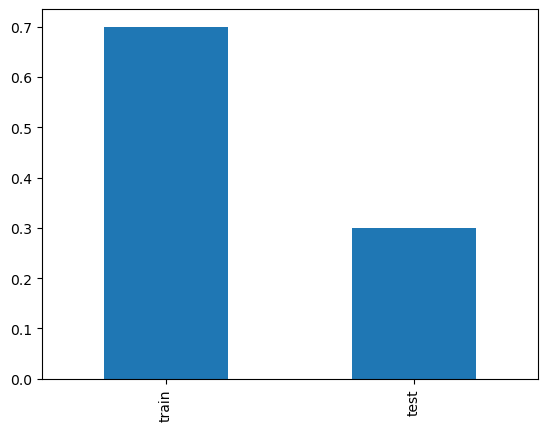

In [5]:
data['split_label'].value_counts(normalize=True).plot(kind = 'bar');
plt.show()

# Inspecting the structure of the DataSet

## Shape of the dataset

In [6]:
    print(data.shape)

(1852394, 24)


## Datatype of the columns

In [7]:
    print(data.dtypes)

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
split_label               object
dtype: object


## Checking for missing values

In [8]:
    print(data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
split_label              0
dtype: int64


## Inspecting Target variable distribution

           count  distribution
genuine  1842743     99.478999
fraud       9651      0.521001


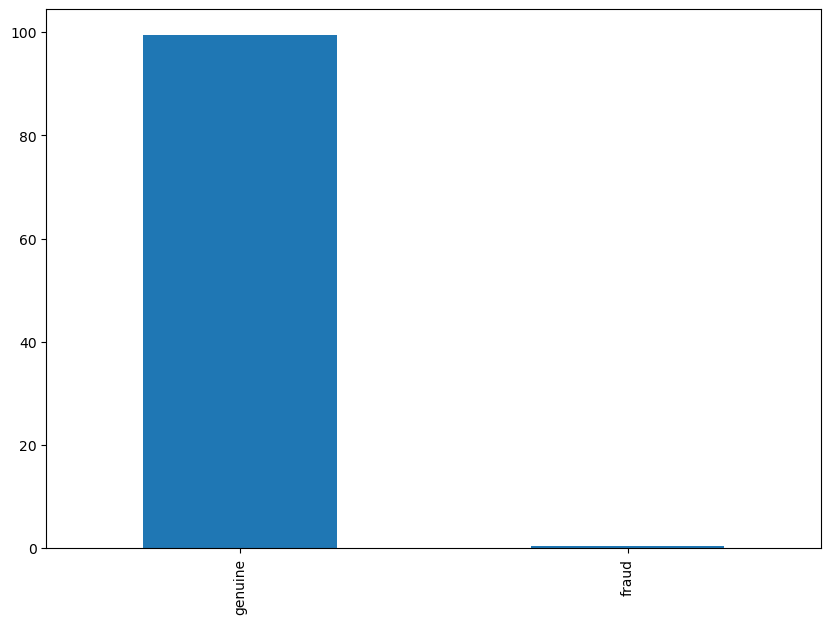

In [9]:
a = data['is_fraud'].value_counts().rename('count') #count of classes
b = (data['is_fraud'].value_counts(normalize = True)*100).rename('distribution') #normalizing the classes
temp = pd.concat([a,b],axis=1)
temp.index = ['genuine','fraud']
temp['distribution'].plot(kind='bar',figsize = [10,7]);
print(temp)
plt.show()

### Inference
    -- The dataset is SEVERELY IMBALANCED , that is known as a 
       class Imbalance problem.    
    -- The majority class,NON_FRAUD,contributes about 99.48%
    -- The minority class,FRAUD,contributes about 0.52%
### Conclusion:
    --- Choose appropriate Dataset Balancing technqiues:
          -> Random UnderSampling
          -> Synthetic Minority OverSampling Technique(SMOTE)
          -> SMOTE-RSB
    --- Choose proper metrics for evaluating the model

# Data Cleaning

## Drop the duplicated records

In [10]:
data.duplicated().sum()

0

## Typecast the appropriate variables

In [11]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_date_trans_time'].head(3)

0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
Name: trans_date_trans_time, dtype: datetime64[ns]

In [12]:
data['dob'] = pd.to_datetime(data['dob'])
data['dob'].head(3)

0   1988-03-09
1   1978-06-21
2   1962-01-19
Name: dob, dtype: datetime64[ns]

## Cardinality of the variables in the dataframe

In [13]:

cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    data[col] = data[col].str.lower().str.strip()
data[cat_cols].nunique().sort_values()


gender               2
split_label          2
category            14
state               51
first              355
last               486
job                497
merchant           693
city               906
street             999
trans_num      1852394
dtype: int64

## Dropping columns with high cardinality

In [14]:
data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,split_label
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_rippin, kub and mann",misc_net,4.97,jennifer,banks,f,561 perry cove,...,-81.1781,3495,"psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train
1,1,2019-01-01 00:00:44,630423337322,"fraud_heller, gutmann and zieme",grocery_pos,107.23,stephanie,gill,f,43039 riley greens suite 393,...,-118.2105,149,special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,train
2,2,2019-01-01 00:00:51,38859492057661,fraud_lind-buckridge,entertainment,220.11,edward,sanchez,m,594 white dale suite 530,...,-112.2620,4154,nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,train


In [15]:
data.drop(data.columns[[0]],axis=1,inplace=True) #faced KeyError while dropping 0th column

In [16]:
drop_cols = ['street','merchant','zip','first','last','trans_num','job']
data.drop(drop_cols,axis=1,inplace=True)
list(data.columns)

['trans_date_trans_time',
 'cc_num',
 'category',
 'amt',
 'gender',
 'city',
 'state',
 'lat',
 'long',
 'city_pop',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'split_label']

# Feature Extraction

## Features from trans_date_trans_time
   * transaction_hour
   * transaction_month
   * transaction_dayname

In [17]:
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data['trans_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [18]:
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [19]:
data['trans_dayofweek']=data['trans_date_trans_time'].dt.day_name()
data['trans_dayofweek'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

## Features from unix_time
    *We will calculate the time delay between the current and 
     previous transaction

In [20]:
data.groupby(['cc_num'])['cc_num'].count().sort_values(ascending=False).describe().astype(int)

count     999
mean     1854
std      1175
min         6
25%       740
50%      1471
75%      2917
max      4392
Name: cc_num, dtype: int32

### Inference:
    * 999 credit card transactions have been recorded.
    * Each credit card has been used an average of 1854 times.
    * Minimum: 6 times && Maximum: 4392 times  







In [21]:
data.sort_values(by = ['cc_num','unix_time'],ascending=True,inplace=True)

In [22]:
data['unix_time_prev_trans'] = data.groupby(by = ['cc_num'])['unix_time'].shift(1)

In [23]:
#removing any null values
data['unix_time_prev_trans'].fillna(data['unix_time']-86400,inplace=True)

In [24]:
data['timedelta_last_trans'] = (data['unix_time'] - data['unix_time_prev_trans'])//60

## Features from dob

In [25]:
data['dob'].head()

1017   1986-02-17
2724   1986-02-17
2726   1986-02-17
2882   1986-02-17
2907   1986-02-17
Name: dob, dtype: datetime64[ns]

In [26]:
#age = trans_date_trans_time - dob
data['cust_age'] = (data['trans_date_trans_time'] - data['dob']).astype('timedelta64[Y]')

data['cust_age'].head()

1017    32.0
2724    32.0
2726    32.0
2882    32.0
2907    32.0
Name: cust_age, dtype: float64

## Features from merchant lat-long and card holder lat-long

In [27]:
#calculating the lat distance between the customer and current merchant
data['lat_dist_cust_merch'] = (data['lat'] -data['merch_lat']).abs()
data['lat_dist_cust_merch'].head(3)

1017    0.969911
2724    0.986034
2726    0.043465
Name: lat_dist_cust_merch, dtype: float64

In [28]:
#calculating the long distance between the customer and current merchant
data['long_dist_cust_merch'] = (data['long'] -data['merch_long']).abs()
data['long_dist_cust_merch'].head(3)

1017    0.845504
2724    0.147772
2726    0.261164
Name: long_dist_cust_merch, dtype: float64

In [29]:
#getting the lat and long values of the previous merchant
data['prev_merch_lat'] = data.groupby(by = ['cc_num'])['merch_lat'].shift(1)
data['prev_merch_long'] = data.groupby(by = ['cc_num'])['merch_long'].shift(1)

In [30]:
#filling the null values with the lat long values of the current merchant
data['prev_merch_lat'].fillna(data['merch_lat'], inplace = True)
data['prev_merch_long'].fillna(data['merch_long'], inplace = True)

In [31]:
#Calculating the lat distance between the current and the previous merchant
data['lat_dist_prev_merch'] = (data['merch_lat'] - data['prev_merch_lat']).abs()
data['lat_dist_prev_merch'].head(3)

1017    0.000000
2724    1.955945
2726    0.942569
Name: lat_dist_prev_merch, dtype: float64

In [32]:
#calculating the long distance between the current and previous merchant
data['long_dist_prev_merch'] = (data['merch_long'] -data['prev_merch_long']).abs()
data['long_dist_prev_merch'].head(3)

1017    0.000000
2724    0.697732
2726    0.113392
Name: long_dist_prev_merch, dtype: float64

## Deleting redundant features

In [33]:
drop_colss = ['trans_date_trans_time','cc_num','unix_time','unix_time_prev_trans','lat','long','merch_lat','merch_long','prev_merch_lat','prev_merch_long','dob','city']

In [34]:
data.drop(drop_colss, axis = 1, inplace = True)
data.reset_index(drop=True, inplace = True)
list(data.columns)

['category',
 'amt',
 'gender',
 'state',
 'city_pop',
 'is_fraud',
 'split_label',
 'trans_hour',
 'trans_month',
 'trans_dayofweek',
 'timedelta_last_trans',
 'cust_age',
 'lat_dist_cust_merch',
 'long_dist_cust_merch',
 'lat_dist_prev_merch',
 'long_dist_prev_merch']

# Variable Analysis and Visualization

## Create subset of dataframes

In [35]:
all_trans = data.copy() 
all_trans['class'] = all_trans['is_fraud'].map({1:'Fraud',0:'Non_Fraud'}) 
normal = all_trans[data['is_fraud'] == 0] 
fraud = all_trans[data['is_fraud'] == 1] 

## Creating functions for performing the analysis

In [36]:
#Function to show simple statistics by class
def stats_by_class(variable):
  stat_grid = all_trans.groupby('class')[variable].agg([np.min,np.max,np.mean,np.median])
  stat_grid = stat_grid.transpose().round(2)
  return stat_grid

In [37]:
#Function to show simple statistics by variable
def stats_by_var(variable):

  n = (normal[variable].value_counts(normalize = True)*100).round(2).rename('normal')
  f = (fraud[variable].value_counts(normalize = True)*100).round(2).rename('fraud')
  return pd.concat([n,f], axis = 1).transpose()

In [38]:
#Function for plotting the box plot
def plot_box (data, x, y, title , width = 10, height = 7):
  
  plt.figure(figsize = [width,height])
  sns.boxplot(data = data, x = x, y = y)
  plt.title(title);

In [39]:
#Function for plotting the normalized count by class
def normalize_count_by_class(variable, width = 20, height = 7):

  plt.figure(figsize = [width,height])

  normalized_normal = (normal.groupby('class')[variable].value_counts(normalize = True)*100).rename('value').reset_index() # calculate the normalized value for normal transactions 

  normalized_fraud = (fraud.groupby('class')[variable].value_counts(normalize = True)*100).rename('value').reset_index() # calculate the normalized valued for the fraud transactions

  plot_table = pd.concat([normalized_normal.set_index(variable)[['class','value']],
                             normalized_fraud.set_index(variable)[['class','value']]], axis = 0).reset_index()
  
  sns.barplot(data = plot_table, x = variable, y = 'value', hue = 'class')
  plt.title('\nNormalized frequency of the varible < '+variable+' > on both classes\n')
  plt.xticks(rotation = 30);

  summary_table = pd.concat([normalized_normal.set_index(variable)['value'],
                             normalized_fraud.set_index(variable)['value']],
                            axis = 1).reset_index()

  summary_table.columns = [variable, 'normal', 'fraud']
  
  summary_table['diff in %'] = (summary_table['fraud'] - summary_table['normal'])

  summary_table.sort_values(by = 'diff in %', ascending = True, inplace = True)

  del normalized_normal,normalized_fraud,plot_table 

  print('\nNormalized frequency of < '+variable+' > on both classes and the percentage diffrence\n')
  
  return summary_table

In [40]:
plt.style.use('ggplot')

## Visualizations and Inferences
    

### is_fraud class distribution

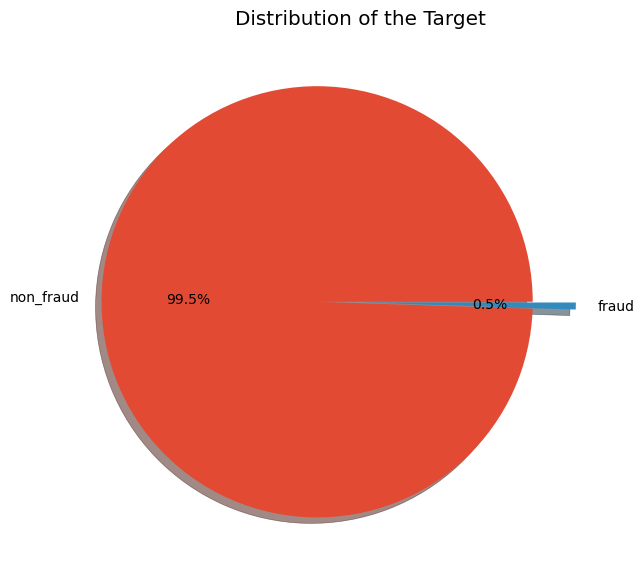

In [41]:
plt.figure(figsize = [7,7])
plot_var = all_trans['is_fraud'].value_counts(normalize = True)
plt.pie(plot_var,
        autopct='%1.1f%%',
        labels = ['non_fraud','fraud'], 
        explode = [0.2, 0], 
        shadow = True) 
plt.title('Distribution of the Target');

#### Inference:
     The classes are highly imbalanced.

### Gender of the card holder by class

,f,m
normal,54.80,45.20
fraud,50.76,49.24


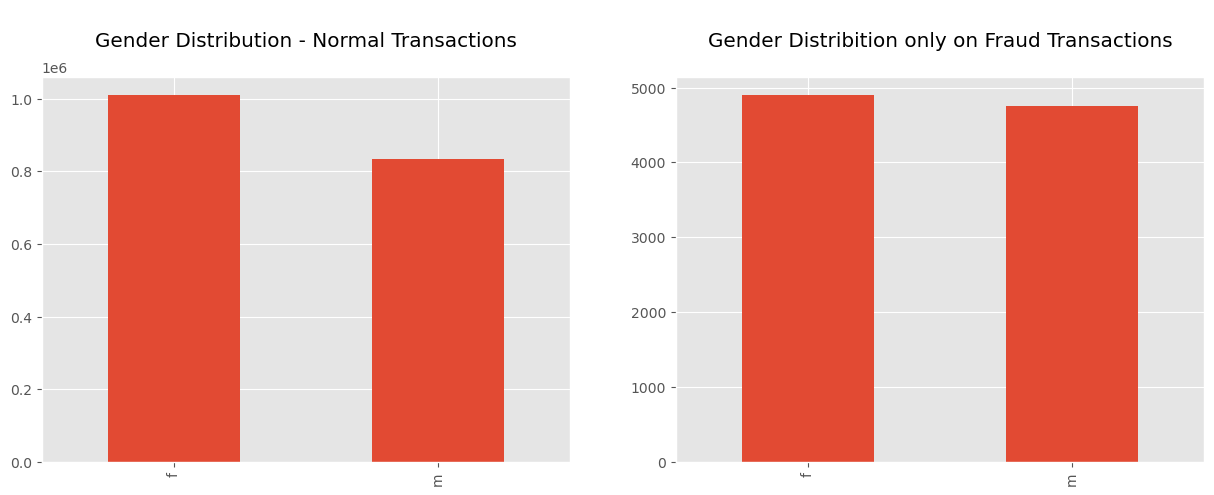

In [42]:

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
normal['gender'].value_counts().plot(kind = 'bar')
plt.title('\nGender Distribution - Normal Transactions\n')


plt.subplot(1,2,2)
fraud['gender'].value_counts().plot(kind = 'bar')
plt.title('\nGender Distribition only on Fraud Transactions\n');

stats_by_var('gender')

#### Inference:
     The fraudulent card transactions are evenly distributed among males and females. 

### Age of the card holder

class,Fraud,Non_Fraud
amin,14.00,13.00
amax,95.00,96.00
mean,48.33,45.75
median,47.00,44.00


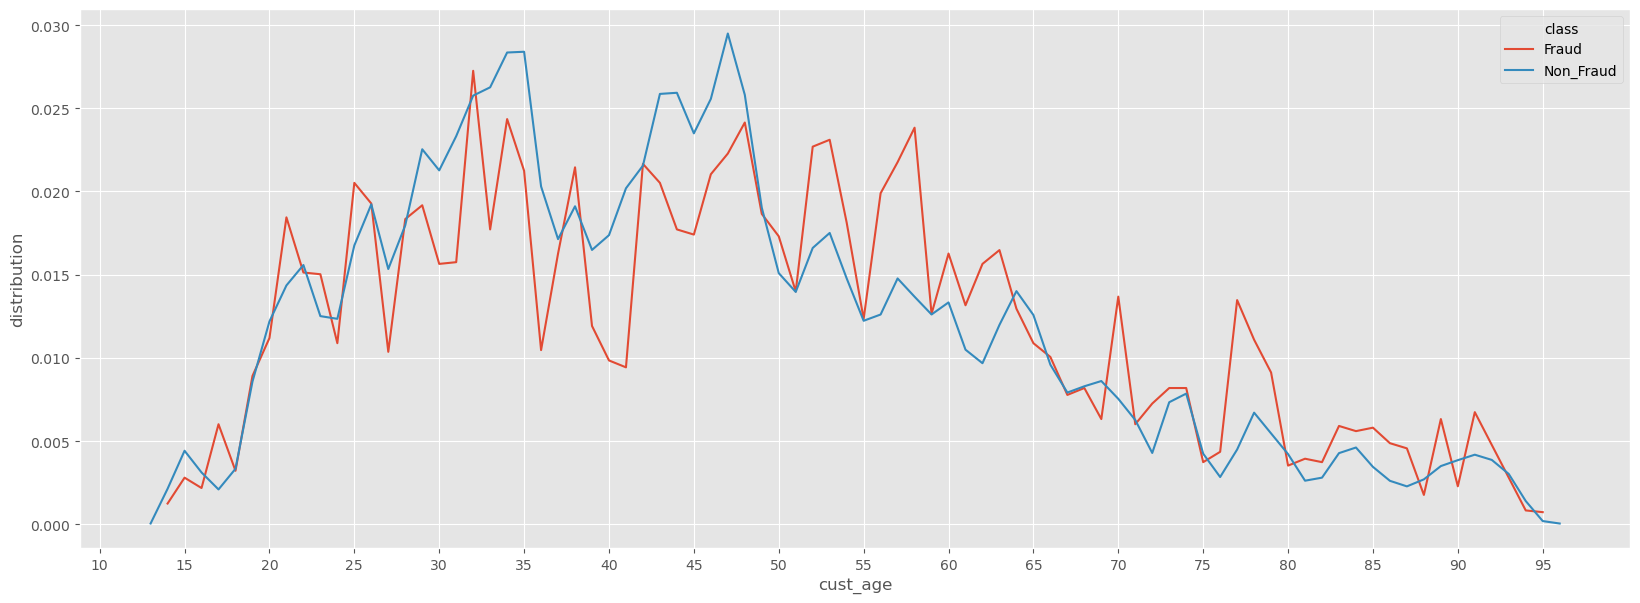

In [43]:
plt.figure(figsize = [20,7])

trans_hour_distribution = all_trans.groupby('class')['cust_age'].value_counts(normalize = True).rename('distribution').reset_index() 
sns.lineplot(data = trans_hour_distribution, x = 'cust_age', y = 'distribution', hue = 'class') 
plt.xticks(np.arange(10,100,5)); 
stats_by_class('cust_age') 

#### Inference:

 --The transactions are majorly from people whose age is in the range of 30 - 50.
 --The Fraudulent transactions are majorly concentrated between the age range 45 - 60. 

### Amount of transactions

class,Fraud,Non_Fraud
amin,1.06,1.00
amax,1376.04,28948.90
mean,530.66,67.65
median,390.00,47.24


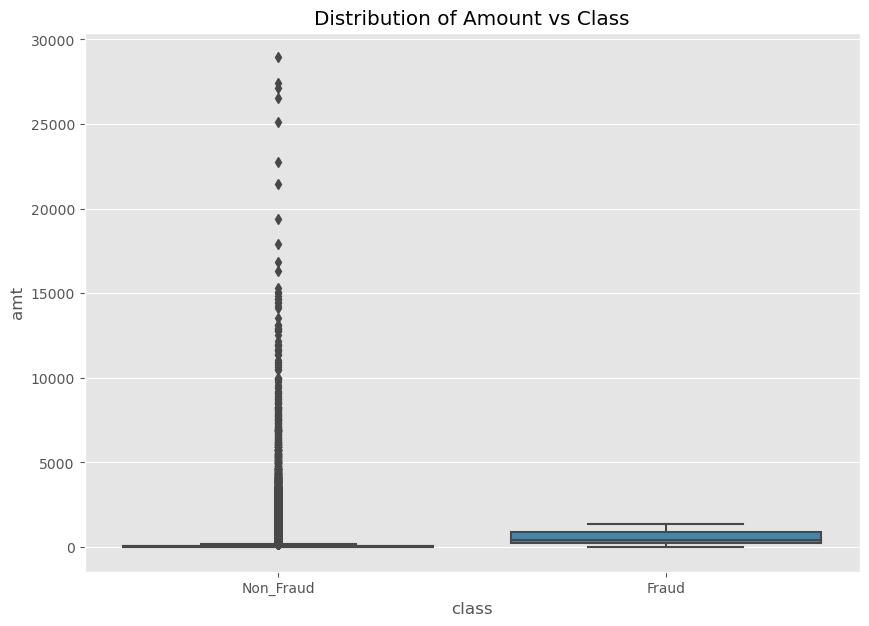

In [44]:
plot_box(all_trans,'class','amt','Distribution of Amount vs Class');
stats_by_class('amt') 

#### Inferences : 
- The mean value of the fraud transactions amount seems to be high ~ 530 dollars whereas in non-fraud transactions it is 67  dollars
-from the boxplot it is very clear that the fraud transaction does not have outlier amount but the majority is heavily concentrated with median of 390 which is very high from the normal transactions


###  Hour of Transactions

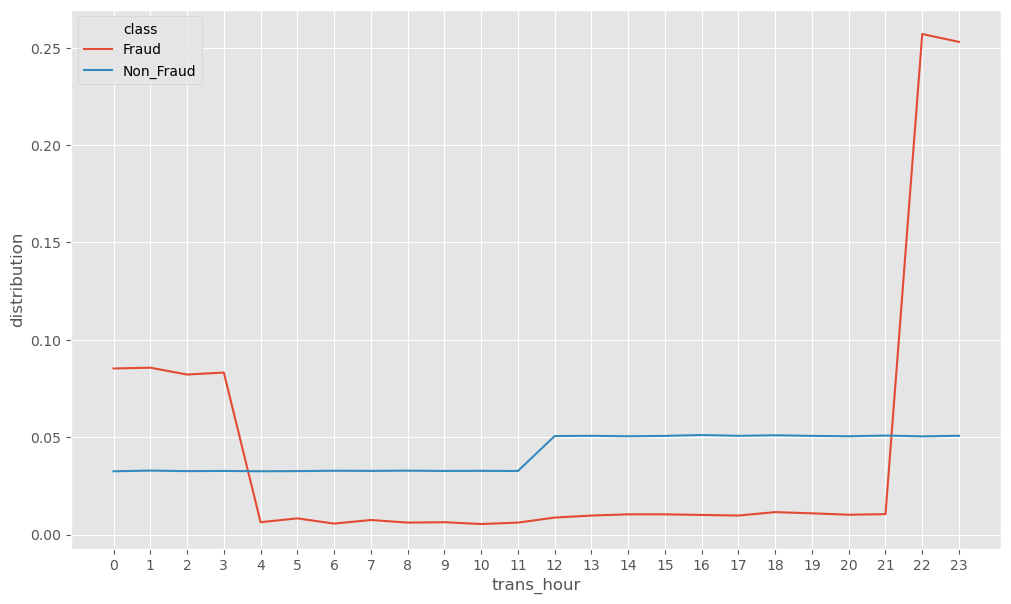

In [45]:
plt.figure(figsize = [12,7])

trans_hour_distribution = all_trans.groupby('class')['trans_hour'].value_counts(normalize = True).rename('distribution').reset_index()

sns.lineplot(data = trans_hour_distribution, x = 'trans_hour', y = 'distribution', hue = 'class')
plt.xticks(np.arange(0,24,1))

plt.show()

#### Inferences :
- Normal Transactions are distributed similarly over the hours with slight increase from 11th hour and maintatinig the same till 23rd hour
- Fraud Transactions are majorly taking place between 21st hour - 04 hour
- In other words, fraud transactions are happening in mid-nigh when the geniune card holders are sleeping and unable to get notified on the transaction messages

#### Delay Between each Transasctions

class,Fraud,Non_Fraud
amin,0.00,0.00
amax,14417.00,22357.00
mean,361.73,516.47
median,84.00,262.00


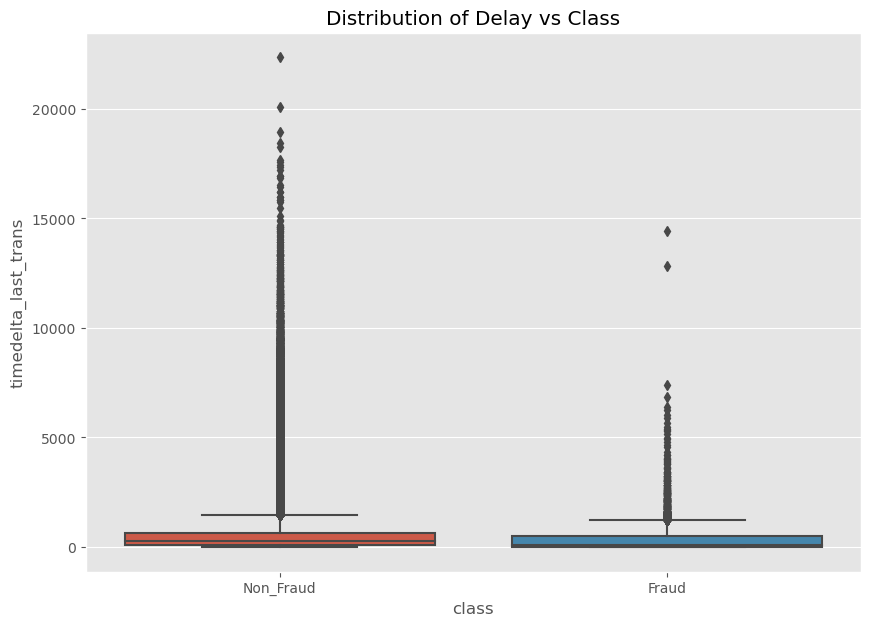

In [46]:
plot_box(all_trans,'class','timedelta_last_trans','Distribution of Delay vs Class')
stats_by_class('timedelta_last_trans')

#### Inference :
-- The Successive fraudulent transactions are spontaneously occuring compared to the other transactions since once the criminal 
   is able to successfully make the first fradulent transaction they will try to exploit it to the maximum before it is     
   detected.

### The Weekday of the Transaction


Normalized frequency of < trans_dayofweek > on both classes and the percentage diffrence



,trans_dayofweek,normal,fraud,diff in %
0,Monday,19.966648,15.376645,-4.590003
1,Sunday,18.564010,16.474977,-2.089034
2,Tuesday,14.601819,13.117812,-1.484008
3,Saturday,14.203500,15.469899,1.266400
6,Wednesday,9.919343,11.656823,1.737480
5,Thursday,11.147729,13.646254,2.498525
4,Friday,11.596951,14.257590,2.660639


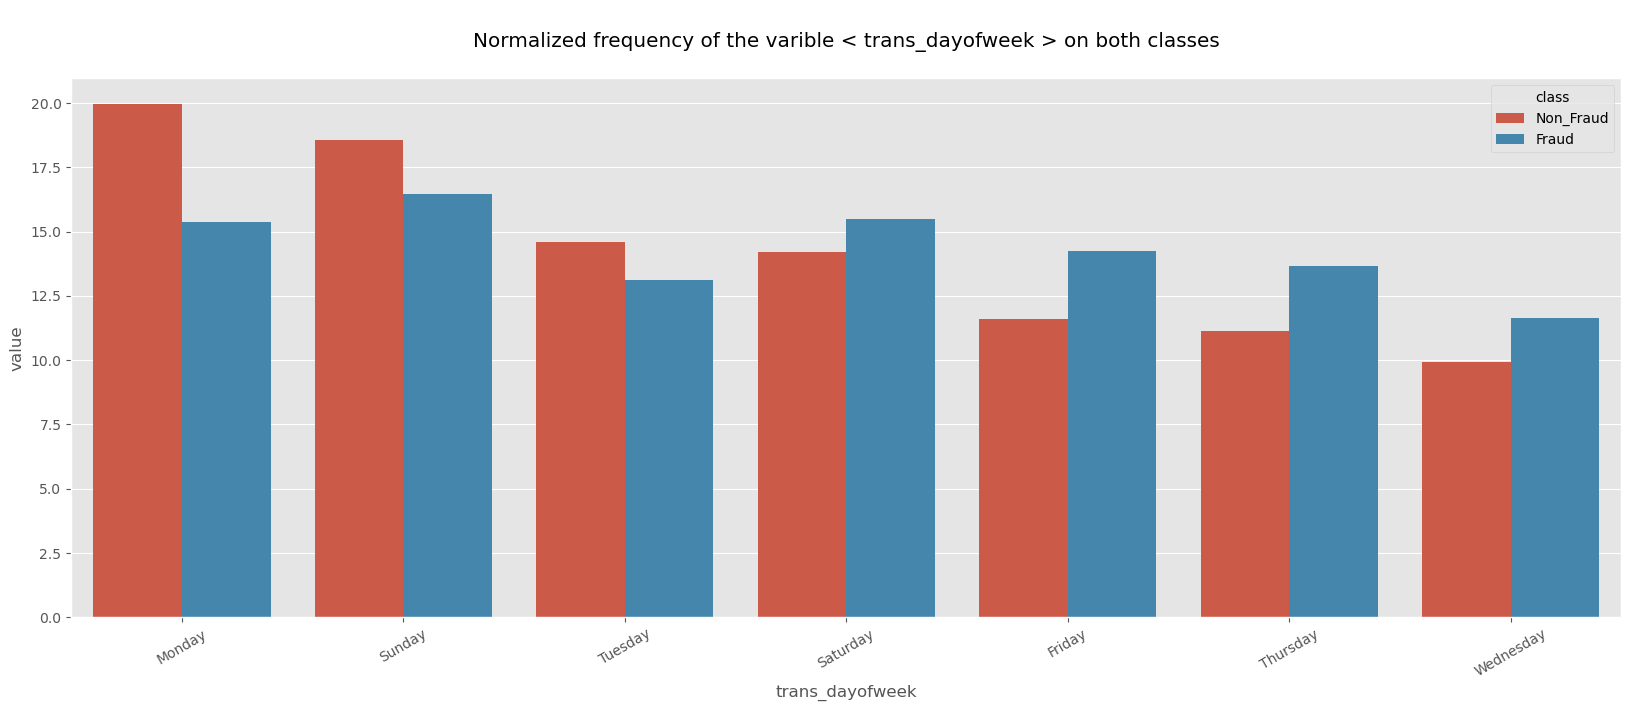

In [47]:
normalize_count_by_class('trans_dayofweek')

#### Inference :
The normalized percentage of the fraud transactions seems to be slight higher in wednesday, thursday, friday and saturday

### Lat Distance between Customer & Merchant

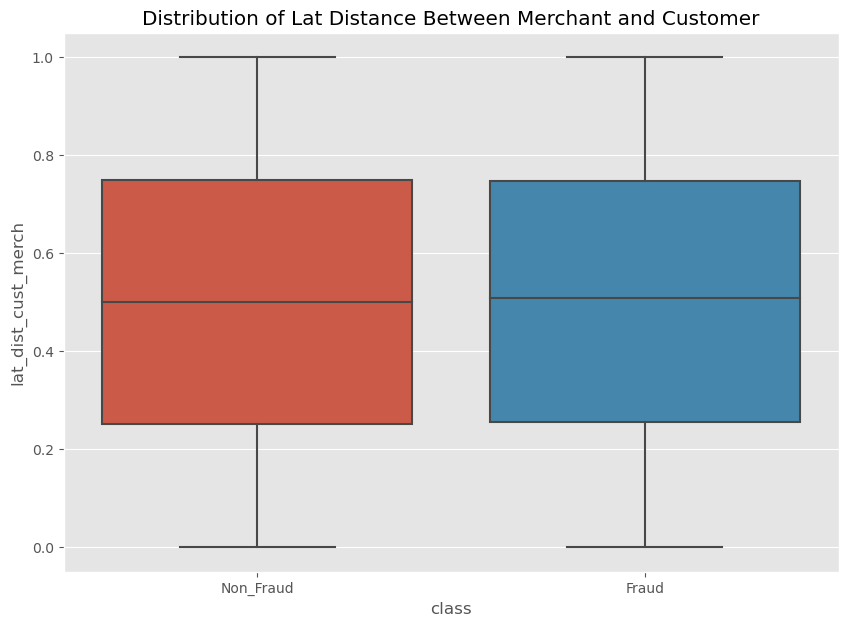

In [48]:
plot_box(all_trans,'class','lat_dist_cust_merch','Distribution of Lat Distance Between Merchant and Customer');

#### Inference :
- There is no any observable difference in the overall distribution in the lat distance between the customer and the merchant

### Long Distance between Customer & Merchant

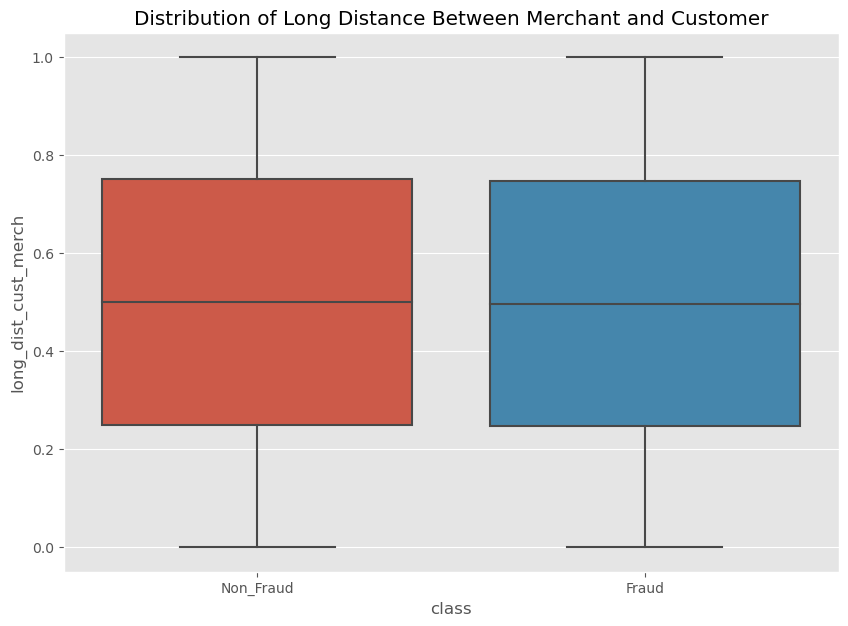

In [49]:
plot_box(all_trans,'class','long_dist_cust_merch','Distribution of Long Distance Between Merchant and Customer');

#### Inferernce
- There is no any observable difference in the overall distribution in the long distance between the customer and the merchant

###  Lat Distance between Current Customer & Prev-Merchant

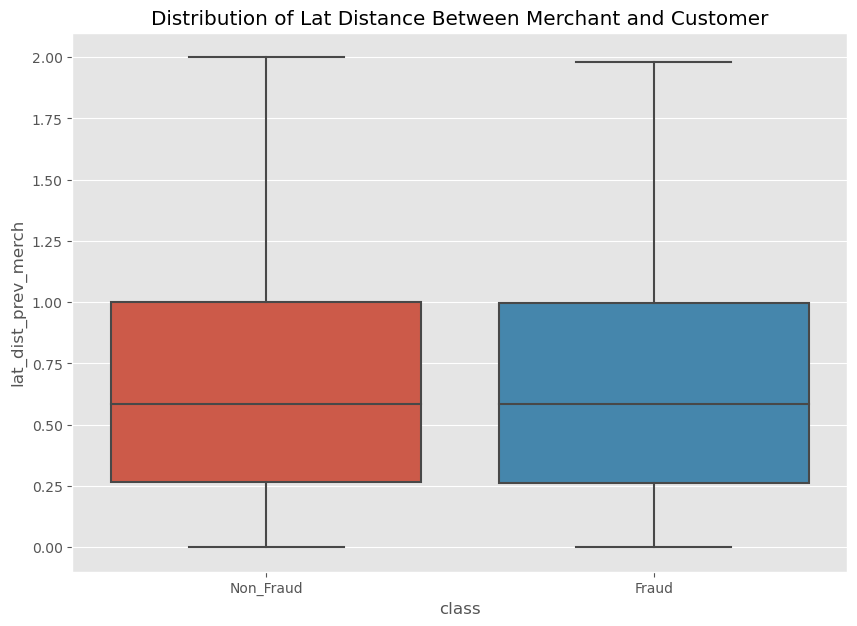

In [50]:
plot_box(all_trans,'class','lat_dist_prev_merch','Distribution of Lat Distance Between Merchant and Customer');

#### Inference :
- There is no any observable difference in the overall distribution in the lat distance between the current and the previous merchant

### Long Distance between Current Customer & Prev-Merchant

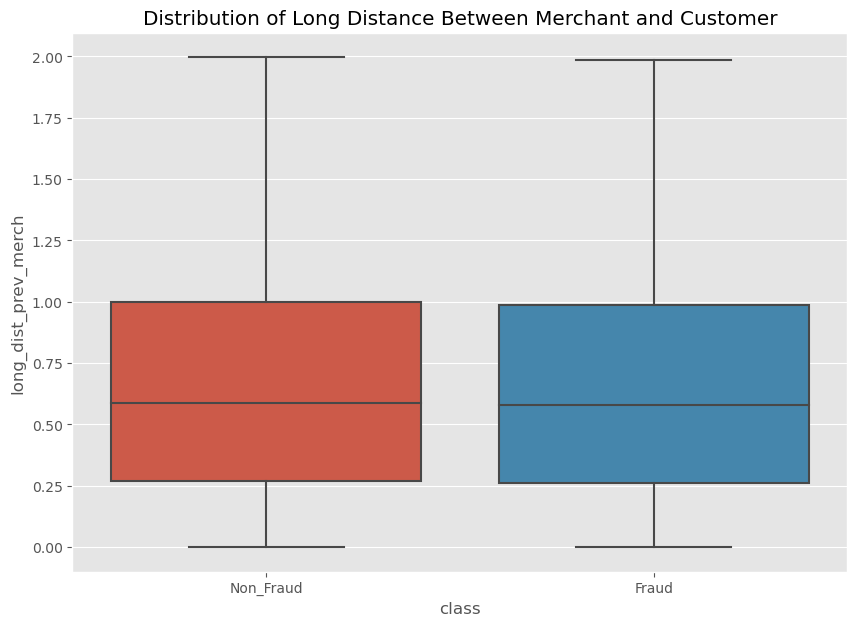

In [51]:
plot_box(all_trans,'class','long_dist_prev_merch','Distribution of Long Distance Between Merchant and Customer');

#### Inference
- There is no any observable difference in the overall distribution in the long distance between the current and the previous merchant

### Category of Item/Service Purchased


Normalized frequency of < category > on both classes and the percentage diffrence



,category,normal,fraud,diff in %
1,home,9.507294,2.745829,-6.761465
4,kids_pets,8.759930,3.149933,-5.609998
7,food_dining,7.083136,2.124132,-4.959004
9,health_fitness,6.640535,1.916900,-4.723636
6,entertainment,7.262326,3.025593,-4.236733
8,personal_care,7.043576,3.004870,-4.038706
10,misc_pos,6.181383,3.336442,-2.844941
0,gas_transport,10.161862,7.999171,-2.162691
12,grocery_net,3.511233,1.813284,-1.697949
13,travel,3.136628,1.616413,-1.520216


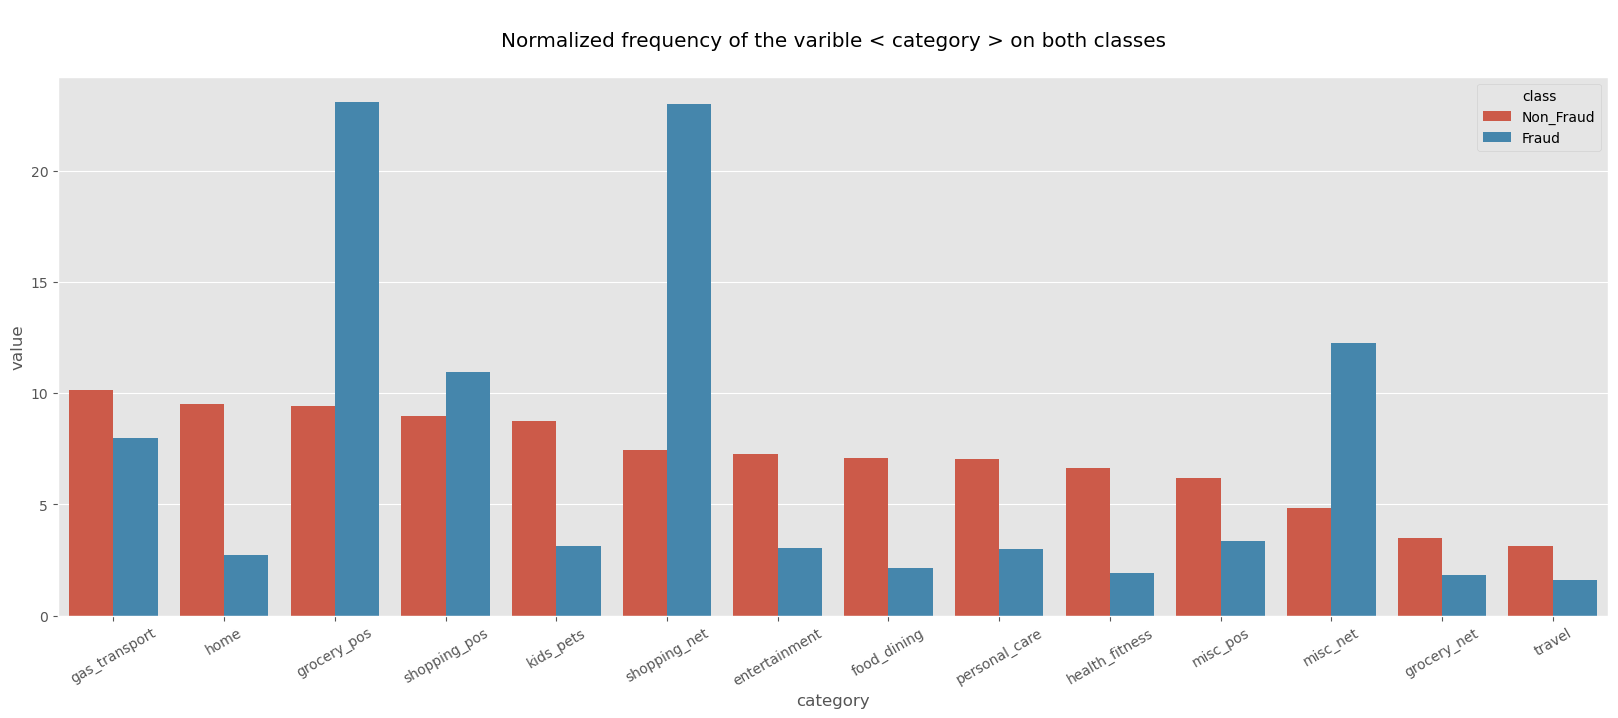

In [52]:
normalize_count_by_class('category')

#### Inference :
- The normalized percentage of the grocery_pos, shopping_pos, shopping_net, misc_net are higher for fraud transactions

### State


Normalized frequency of < state > on both classes and the percentage diffrence



,state,normal,fraud,diff in %
0,tx,7.308507,6.134079,-1.174428
22,wv,1.974394,1.512797,-0.461597
5,mi,3.555895,3.098125,-0.457770
27,la,1.619325,1.170863,-0.448462
11,ar,2.410320,2.020516,-0.389804
12,nc,2.330168,2.020516,-0.309652
8,al,3.160669,2.880531,-0.280138
34,nd,1.144978,0.870376,-0.274602
28,wy,1.500860,1.233033,-0.267828
9,mo,2.965253,2.714745,-0.250509


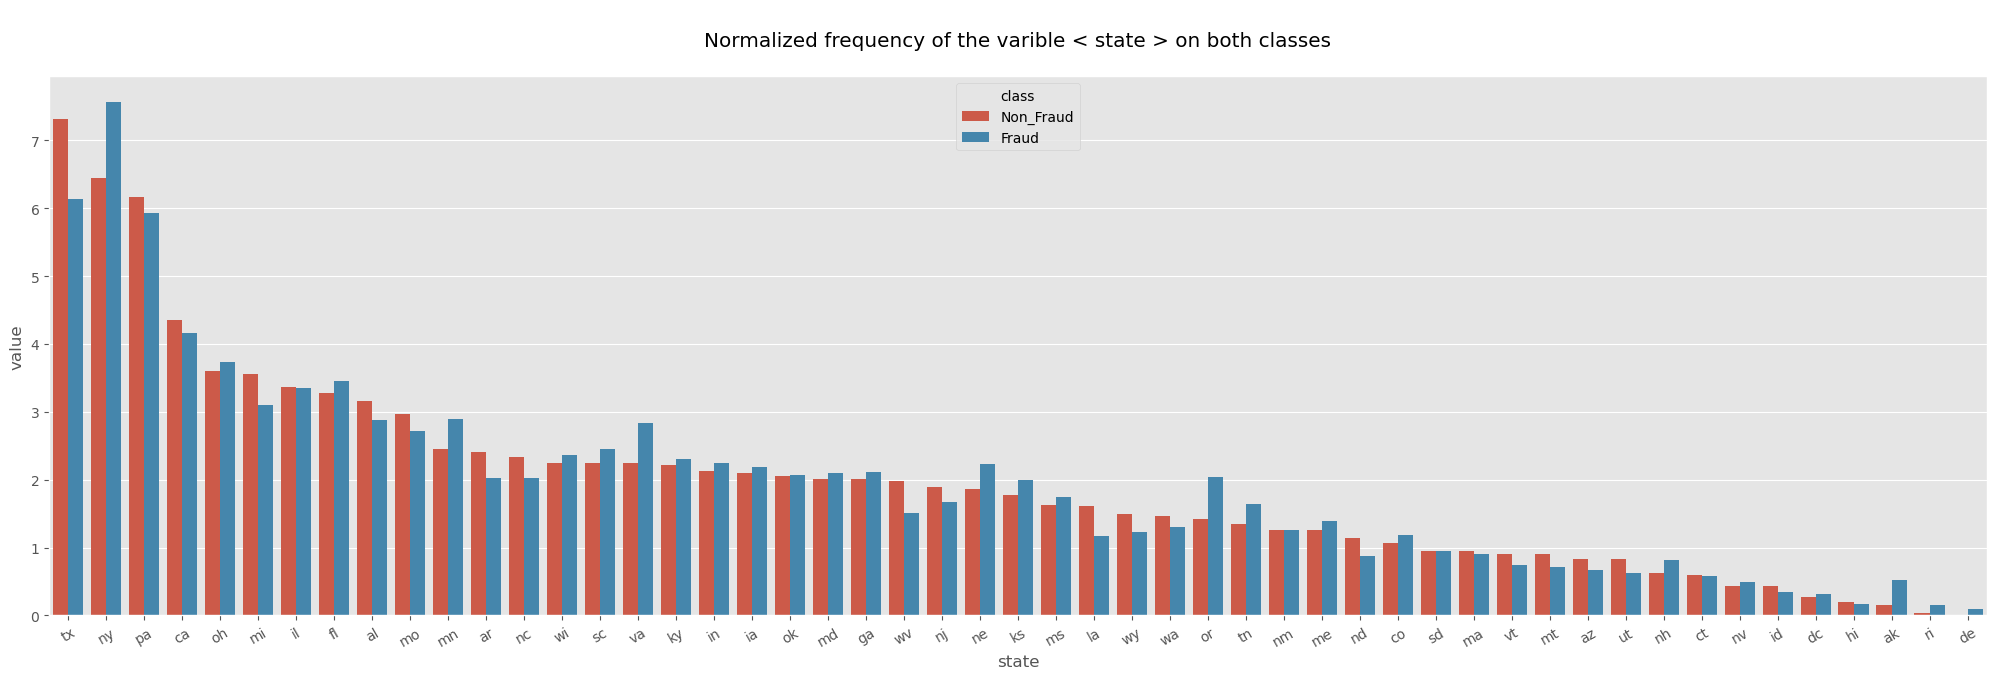

In [53]:
normalize_count_by_class('state', width = 25)

### Correlation Matrix between the variables

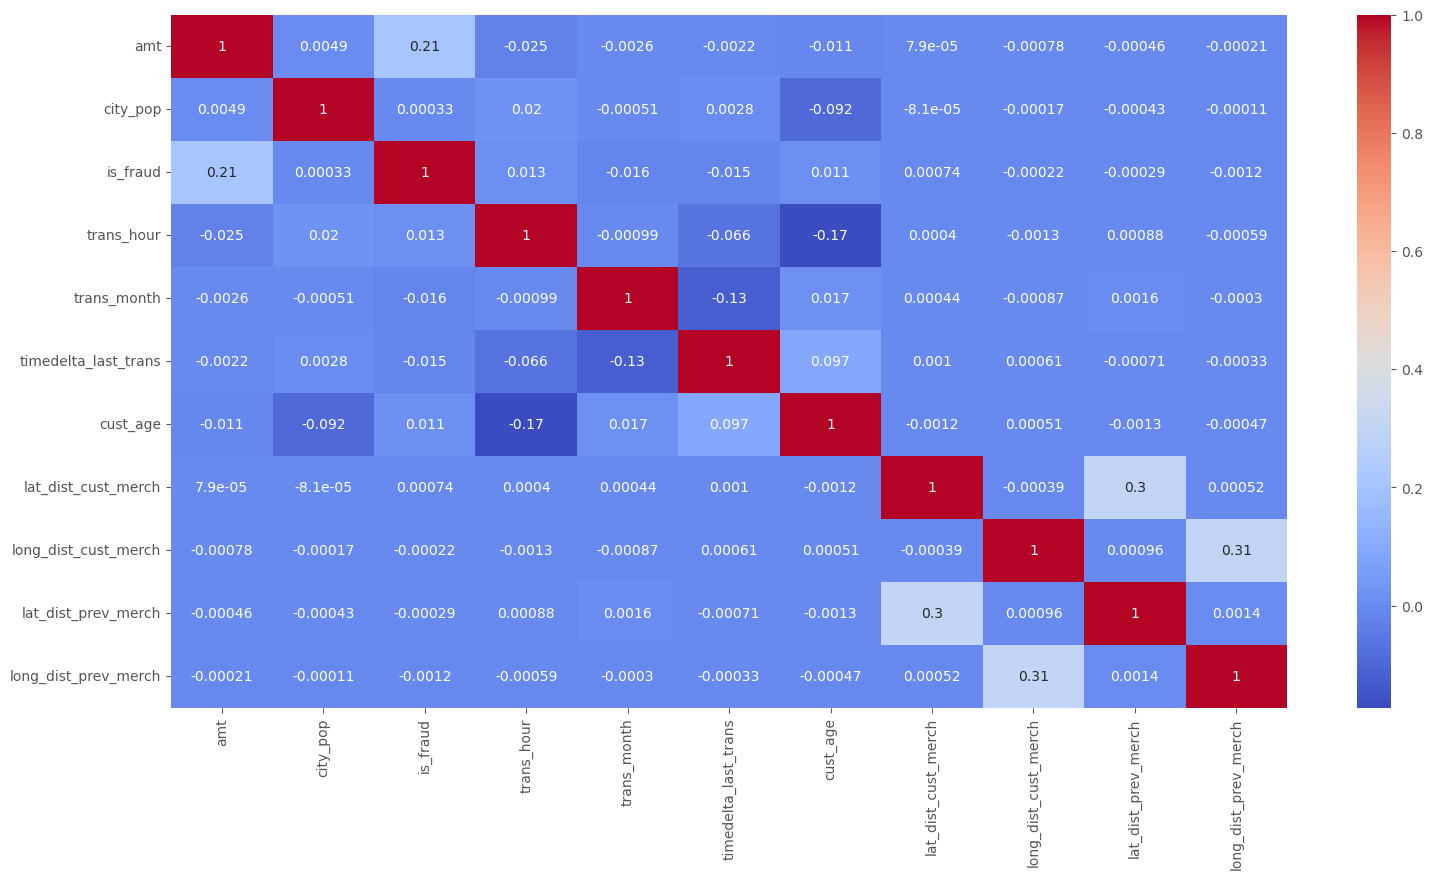

In [54]:
fig = plt.figure(figsize=(18,9))
sns.heatmap(all_trans.corr(),cmap='coolwarm', annot=True)
plt.show()

#### Inference :
There is not much visible correlations are seen.

In [55]:
del all_trans,normal,fraud

# Data Preprocessing

##  Split the Train - Test Dataset

In [56]:
train_data = data[data['split_label'] == 'train']

test_data = data[data['split_label'] == 'test']

In [57]:
train_data.drop('split_label', axis =1, inplace = True)

test_data.drop('split_label', axis =1, inplace = True)

In [58]:
X_train = train_data.drop('is_fraud', axis = 1)
y_train = train_data['is_fraud']

X_test = test_data.drop('is_fraud', axis = 1)
y_test = test_data['is_fraud']

## Create a Symmetric train Dataset For Preprocessing

In [59]:
from sklearn.utils import resample

In [60]:
train_majority = train_data[train_data['is_fraud'] == 0]

train_minority = train_data[train_data['is_fraud'] == 1]

majority_count = len(train_majority)

majority_count

1289169

In [61]:
minority_resampled = resample(train_minority,n_samples = majority_count)

In [62]:
train_symmetric = pd.concat([train_majority,minority_resampled], axis = 0)

train_symmetric['is_fraud'].value_counts(normalize = True)

0    0.5
1    0.5
Name: is_fraud, dtype: float64

In [63]:
train_symmetric_X = train_symmetric.drop('is_fraud', axis = 1)

train_symmetric_y = train_symmetric['is_fraud']

## Outlier Handling
- For the outlier handling, we choose to use the an open-source library feature_engine

In [64]:
!pip install feature_engine

clear_output()

In [65]:
num_cols = X_train.select_dtypes(include = np.number).columns

num_cols

Index(['amt', 'city_pop', 'trans_hour', 'trans_month', 'timedelta_last_trans',
       'cust_age', 'lat_dist_cust_merch', 'long_dist_cust_merch',
       'lat_dist_prev_merch', 'long_dist_prev_merch'],
      dtype='object')

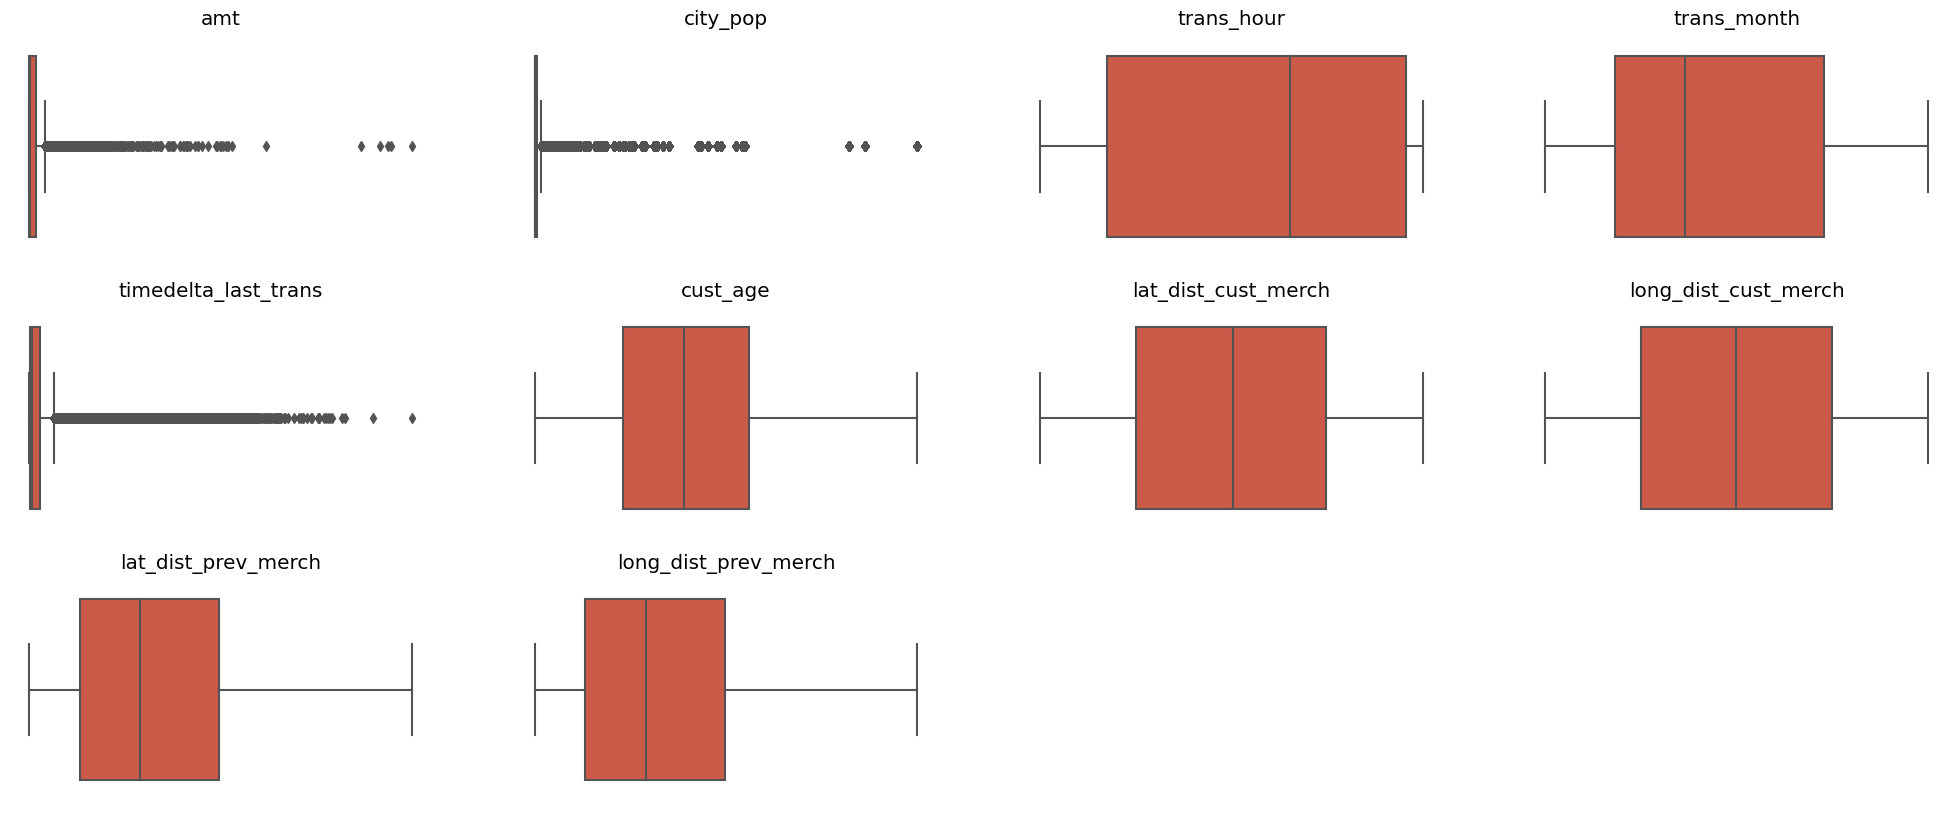

In [66]:
plt.figure(figsize = [25,10])

for ind,col_name in enumerate(num_cols):
  plot_var = train_symmetric_X[col_name]
  plt.subplot(3,4,ind+1)
  sns.boxplot(plot_var)
  plt.title(col_name)
  plt.axis(False)

#### Inference : 
The the following variables has outliers in it.

- amt
- city_pop
- timedelta_last_trans

some of the classfiers may migh be affected by the outliers. hence we need to handle them properly.

lets cap the variable at the Inter-quantile-range

- IQR = 75th Quantile - 25th Quantile
- Outliers (Right) = 75th Quantile + 1.5* IQR
- Outliesr (Left) = 25th Quantile - 1.5 * IQR

In [67]:
from feature_engine.outliers import Winsorizer

In [68]:
variables = ['amt', 'city_pop', 'timedelta_last_trans']

capper_iqr = Winsorizer(capping_method = 'iqr',tail = 'both', fold = 1.5, variables = variables)

In [69]:
capper_iqr.fit(train_symmetric_X)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['amt', 'city_pop', 'timedelta_last_trans'])

In [70]:
print('upper capping value : ',capper_iqr.right_tail_caps_)

print('lower capping value : ',capper_iqr.left_tail_caps_)

upper capping value :  {'amt': 1175.39, 'city_pop': 50080.5, 'timedelta_last_trans': 1461.5}
lower capping value :  {'amt': -672.85, 'city_pop': -28859.5, 'timedelta_last_trans': -806.5}


In [71]:
train_symmetric_X = capper_iqr.transform(train_symmetric_X)

X_train = capper_iqr.transform(X_train)

X_test = capper_iqr.transform(X_test)

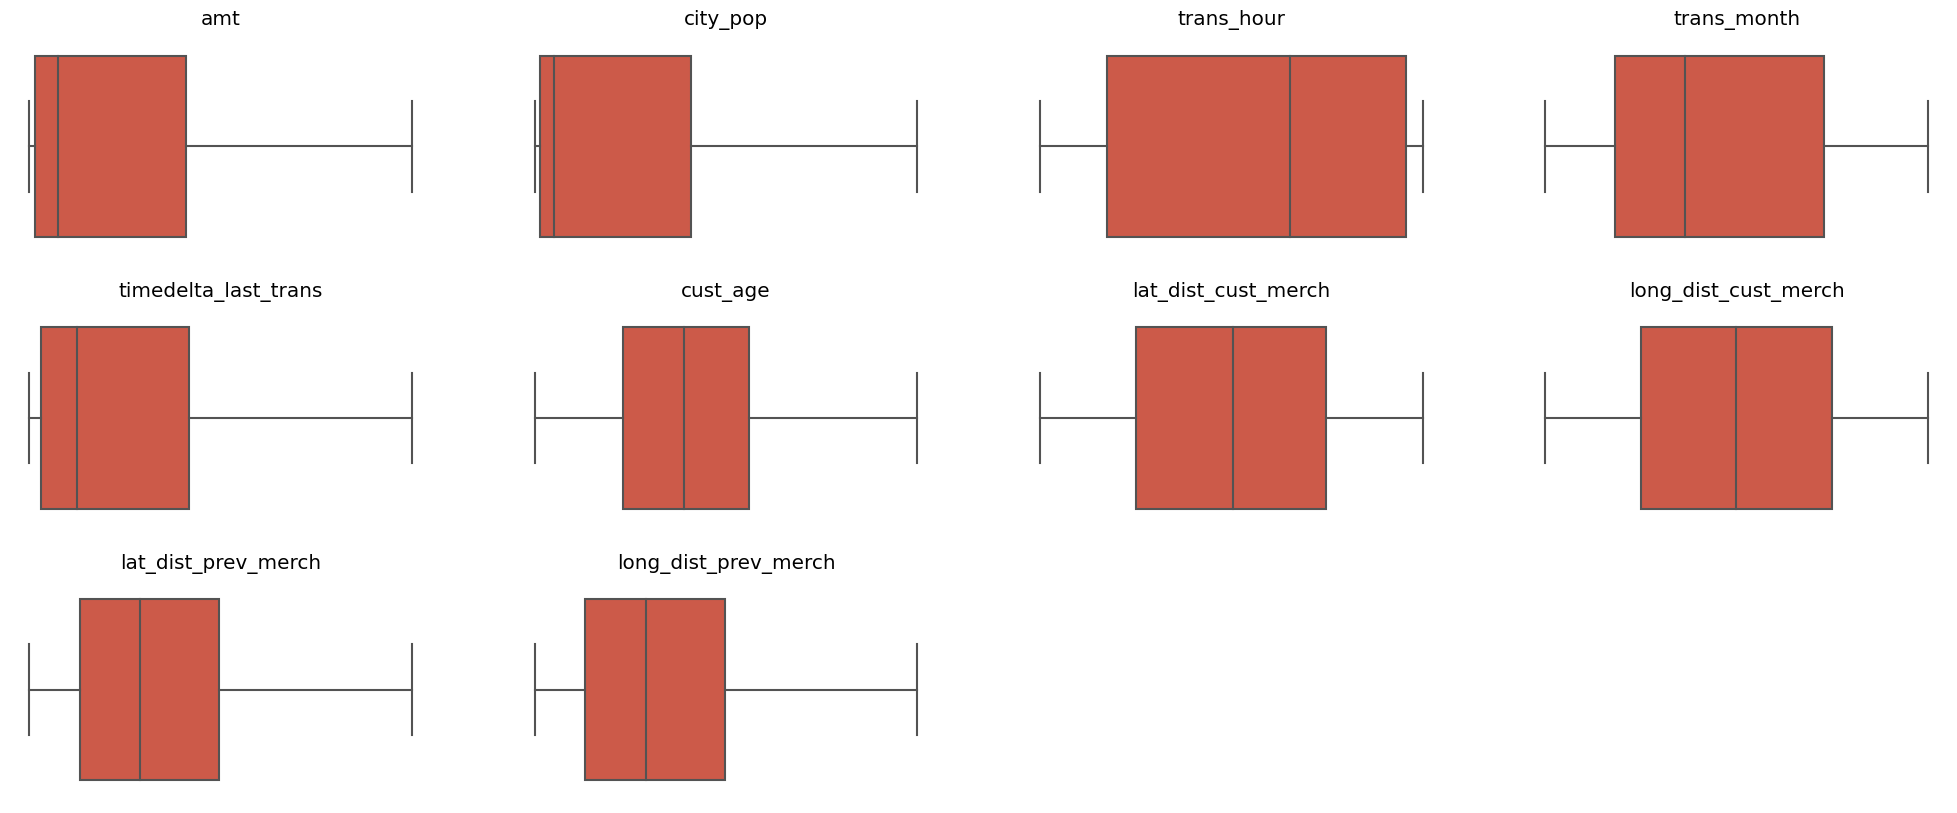

In [72]:
plt.figure(figsize = [25,10])

for ind,col_name in enumerate(num_cols):
  plot_var = train_symmetric_X[col_name]
  plt.subplot(3,4,ind+1)
  sns.boxplot(plot_var)
  plt.title(col_name)
  plt.axis(False)

## Categorical Encoding

To convert non-numeric categorical variables into numerical values to be used by model building phase, allowing them to use categorical data and improve performance, it prevent the curse of dimensionality.

Steps

Check the cardinality of the variables

Choose the encoding type

Execute the encoding

### Check the Cardinality of the Categorical variables

In [73]:
cat_cols = X_train.select_dtypes(exclude = np.number).columns # choose the categorical variables

X_train[cat_cols].nunique().sort_values(ascending = False) # look at the cardinalitries of the categorical variables

state              51
category           14
trans_dayofweek     7
gender              2
dtype: int64

### Choosing Encoding Types

1.OneHotEncoding** : category , gender

2.Target Guided Mean Encoding :** state,trans_dayofweek

### Execute the Encoding - OneHotEncoding

#### import the OneHotEncoder Class from the feature engine

In [74]:
from feature_engine.encoding import OneHotEncoder

In [75]:
variables = ['category','gender']

In [76]:
onehot_encod = OneHotEncoder(variables = variables, drop_last = True)

In [77]:
onehot_encod.fit(train_symmetric_X)

OneHotEncoder(drop_last=True, variables=['category', 'gender'])

#### Transfrom self, Real X_train and real X_test

In [78]:
train_symmetric_X = onehot_encod.transform(train_symmetric_X) # transform the symmetric X

X_train = onehot_encod.transform(X_train) # transform the real X

X_test = onehot_encod.transform(X_test) # transform test X

### Execute the Encoding - Target Guided Mean Encoding

In [79]:
from feature_engine.encoding import MeanEncoder

In [80]:
variables = ['state','trans_dayofweek']

In [81]:
#Creating the mean encoder instance
mean_encod = MeanEncoder(variables = variables)

In [82]:
#Fitting the object on the symmetric X train
mean_encod.fit(train_symmetric_X,train_symmetric_y)

MeanEncoder(variables=['state', 'trans_dayofweek'])

In [83]:
# Lets look at the encoding dict
mean_encod.encoder_dict_

{'state': {'ak': 0.7461941298258434,
  'al': 0.4740263928483895,
  'ar': 0.4723083739477182,
  'az': 0.36942600317255153,
  'ca': 0.5000713750401484,
  'co': 0.5821217180148732,
  'ct': 0.2611036339165545,
  'dc': 0.5058467464575594,
  'de': 1.0,
  'fl': 0.5301485258257592,
  'ga': 0.49190323086574655,
  'hi': 0.3303594856992915,
  'ia': 0.4742542648412558,
  'id': 0.25246521680399836,
  'il': 0.49875282653798636,
  'in': 0.47093191415514546,
  'ks': 0.5387628990892385,
  'ky': 0.4831739543032338,
  'la': 0.4279998903899378,
  'ma': 0.49094142951687625,
  'md': 0.5098644578313253,
  'me': 0.5576133909287257,
  'mi': 0.47442882651893226,
  'mn': 0.5292333437924903,
  'mo': 0.46087643556533764,
  'ms': 0.48350490196078433,
  'mt': 0.31821089978479616,
  'nc': 0.45958118753252347,
  'nd': 0.3989389920424403,
  'ne': 0.5639179755671903,
  'nh': 0.5558257674016429,
  'nj': 0.45210230705542753,
  'nm': 0.4625160504395351,
  'nv': 0.5966045128056301,
  'ny': 0.5352696630472541,
  'oh': 0.5461

In [84]:
#Transforming the X_symmetric, Real_X and X_test

train_symmetric_X = mean_encod.transform(train_symmetric_X) # transforming the symmetric X

X_train = mean_encod.transform(X_train) # Transforming the Real X Train

X_test = mean_encod.transform(X_test) # Transforming the X test

In [85]:
#All the variables are now converted into numbers
X_train.dtypes

amt                        float64
state                      float64
city_pop                   float64
trans_hour                   int64
trans_month                  int64
trans_dayofweek            float64
timedelta_last_trans       float64
cust_age                   float64
lat_dist_cust_merch        float64
long_dist_cust_merch       float64
lat_dist_prev_merch        float64
long_dist_prev_merch       float64
category_misc_net            int32
category_gas_transport       int32
category_kids_pets           int32
category_home                int32
category_shopping_net        int32
category_food_dining         int32
category_personal_care       int32
category_grocery_pos         int32
category_entertainment       int32
category_shopping_pos        int32
category_misc_pos            int32
category_travel              int32
category_health_fitness      int32
gender_f                     int32
dtype: object

## Transforming the Highly Skewed Variables
- look at the skewness of the variables
- list the variables having skewness more than 2.0 or lesser than -2.0
- lets look at the varibale minimum value to decide the which transformation can be choosen.
- Fit and tranform the transformer

### Look at the skewness of the variables

In [86]:
X_train.skew()

amt                        5.701105
state                     -1.075319
city_pop                   1.191580
trans_hour                -0.282825
trans_month                0.298516
trans_dayofweek           -0.104020
timedelta_last_trans       1.100931
cust_age                   0.610874
lat_dist_cust_merch       -0.001202
long_dist_cust_merch      -0.001450
lat_dist_prev_merch        0.565637
long_dist_prev_merch       0.565088
category_misc_net          4.188097
category_gas_transport     2.638516
category_kids_pets         2.926938
category_home              2.763540
category_shopping_net      3.220984
category_food_dining       3.354589
category_personal_care     3.370824
category_grocery_pos       2.755556
category_entertainment     3.297053
category_shopping_pos      2.865788
category_misc_pos          3.652961
category_travel            5.389197
category_health_fitness    3.488526
gender_f                  -0.190655
dtype: float64

### list the variables having skewness more than 2.0 or lesser than -2.0

In [87]:
skew = X_train.skew()
feature_high_skew = list(skew[(skew > 2) | (skew < -2)].index)
feature_high_skew

['amt',
 'category_misc_net',
 'category_gas_transport',
 'category_kids_pets',
 'category_home',
 'category_shopping_net',
 'category_food_dining',
 'category_personal_care',
 'category_grocery_pos',
 'category_entertainment',
 'category_shopping_pos',
 'category_misc_pos',
 'category_travel',
 'category_health_fitness']

In [88]:
X_train.min()

amt                         1.000000
state                       0.252465
city_pop                   23.000000
trans_hour                  0.000000
trans_month                 1.000000
trans_dayofweek             0.445355
timedelta_last_trans        0.000000
cust_age                   13.000000
lat_dist_cust_merch         0.000000
long_dist_cust_merch        0.000000
lat_dist_prev_merch         0.000000
long_dist_prev_merch        0.000000
category_misc_net           0.000000
category_gas_transport      0.000000
category_kids_pets          0.000000
category_home               0.000000
category_shopping_net       0.000000
category_food_dining        0.000000
category_personal_care      0.000000
category_grocery_pos        0.000000
category_entertainment      0.000000
category_shopping_pos       0.000000
category_misc_pos           0.000000
category_travel             0.000000
category_health_fitness     0.000000
gender_f                    0.000000
dtype: float64

Note : Since we have zero or negative values in the dataset, We can try the following,

- Yoejohnson Transformation

In [89]:
# Import the YeoJohnsonTransformer from feature Engine
from feature_engine.transformation import YeoJohnsonTransformer

In [90]:
#Creating the transformer object
yeojohnson_transformer = YeoJohnsonTransformer(variables = feature_high_skew)

In [91]:
#Fitting the symmetric X train
yeojohnson_transformer.fit(train_symmetric_X)

YeoJohnsonTransformer(variables=['amt', 'category_misc_net',
                                 'category_gas_transport', 'category_kids_pets',
                                 'category_home', 'category_shopping_net',
                                 'category_food_dining',
                                 'category_personal_care',
                                 'category_grocery_pos',
                                 'category_entertainment',
                                 'category_shopping_pos', 'category_misc_pos',
                                 'category_travel', 'category_health_fitness'])

In [92]:
#Transform the dataset to the transformation object

train_symmetric_X = yeojohnson_transformer.transform(train_symmetric_X) # transforming the symmetric X

X_train = yeojohnson_transformer.transform(X_train) # Transforming the Real X

X_test = yeojohnson_transformer.transform(X_test) # Transforming the X test

## Feature Scalling

- Lets use the min-max scaler (normalization) since the dataset is not in the risk of the outliers.

- Note : MinMaxScaler is a feature scaling method in scikit-learn which scales the data set so that all the features lie between 0 and 1, it helps to normalize the data and it's useful for algorithm that are sensitive to the scale of the input features

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
scaler = MinMaxScaler() # creating the scaler object

In [95]:
scaler.fit(train_symmetric_X) # fit on the symmetric X to learn the parameter for the scaler

MinMaxScaler()

In [96]:
scaler.data_max_

array([9.25322814e+00, 1.00000000e+00, 5.00805000e+04, 2.30000000e+01,
       1.20000000e+01, 5.50704137e-01, 1.46150000e+03, 9.50000000e+01,
       9.99999000e-01, 9.99997000e-01, 1.99967700e+00, 1.99622300e+00,
       5.91566380e-02, 6.36697266e-02, 4.13403876e-02, 4.20692096e-02,
       1.05754616e-01, 3.14923926e-02, 3.44611385e-02, 1.14695017e-01,
       3.59967248e-02, 7.00872815e-02, 3.28946366e-02, 1.62223030e-02,
       2.91906280e-02, 1.00000000e+00])

In [97]:
scaler.data_min_

array([ 0.71097975,  0.25246522, 23.        ,  0.        ,  1.        ,
        0.4453551 ,  0.        , 13.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ])

In [98]:
train_symmetric_X = pd.DataFrame(data = scaler.transform(train_symmetric_X), columns = train_symmetric_X.columns)

X_train = pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns)

In [99]:
print('number of arrived columns : ', len(X_train.columns))

X_train.agg(func =[np.min,np.max,np.mean, np.std], axis = 0).transpose().round(2)

number of arrived columns :  26


,amin,amax,mean,std
amt,0.0,1.0,0.40,0.19
state,0.0,1.0,0.32,0.07
city_pop,0.0,1.0,0.27,0.39
trans_hour,0.0,1.0,0.56,0.30
trans_month,0.0,1.0,0.47,0.31
trans_dayofweek,0.0,1.0,0.49,0.38
timedelta_last_trans,0.0,1.0,0.31,0.31
cust_age,0.0,1.0,0.40,0.21
lat_dist_cust_merch,0.0,1.0,0.50,0.29
long_dist_cust_merch,0.0,1.0,0.50,0.29


# Resampling for Modeling

#### Context :

- Now we've got a better set of data to be trained on, in terms of data type and value consistency
- On the otherside the dataset still is huge for modeling in term of experimenting and tuning different models
- And the target label is still highly imbalanced ~ 99.5 % : 0.5 %
- Minority class need to have enough representation so that the model is not biased, hence the minority class need to be over sampled
- Majority class must be repeatative in the terms of a common pottern across the dataset, hence that can be under sampled


#### Strategy :

- Create training samples through hybrid resampling methods
- Create two difftent trainig samples
- 1 For Training the models
- Another one for a much smaller version for hyperparameter tuning
- Use imblearn - make_pipeline class for resampling pipeline
- Majority and Minority class must be equally contributing to both sub-samples
- The best of the model shall be re-trained on the balance sample on its entirety

In [100]:
# Lets check the original train set status
print(X_train.shape, y_train.shape,'\n')
print(y_train.value_counts(normalize = True)*100)

(1296675, 26) (1296675,) 

0    99.421135
1     0.578865
Name: is_fraud, dtype: float64


In [111]:
# Import SMOTE, RandomUnderSampler & make_pipeline Classes from the imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

In [102]:
# total legth of the resulting sample = control_length x 2
ini_records = sum(y_train == 0) # get to the number record representing the majority class

control_len = ini_records//3 # arriving the control length

control_len # display the control lengh ( expected numeber of each class in the resulting dataset )

429723

In [103]:
# Make pipeline for making the sample for Training
resample_pipeline_learning = make_pipeline(SMOTE(sampling_strategy = {1:control_len}, n_jobs = -1, random_state = 42), # oversampling of the minority class
                                  RandomUnderSampler(sampling_strategy = {0:control_len},random_state = 42), # undersampling the majority class
                                  verbose = 1)

In [104]:
X_resampled, y_resampled = resample_pipeline_learning.fit_resample(X_train,y_train)

[Pipeline] ............. (step 1 of 2) Processing smote, total=   2.4s
[Pipeline]  (step 2 of 2) Processing randomundersampler, total=   0.9s


In [105]:
print(X_resampled.shape, y_resampled.shape,'\n')
print(y_resampled.value_counts(normalize = True)*100)

(859446, 26) (859446,) 

0    50.0
1    50.0
Name: is_fraud, dtype: float64


In [106]:
control_len = 100000 # limiting the length of each class into much reduced size

resample_pipeline_hp_tuning = make_pipeline(SMOTE(sampling_strategy = {1:control_len}, n_jobs = -1, random_state = 42), # over sampling the minority class
                                  RandomUnderSampler(sampling_strategy = {0:control_len},random_state = 42), # undersampling the majority class
                                  verbose = 1)

X_hp_tuning, y_hp_tuning = resample_pipeline_hp_tuning.fit_resample(X_train,y_train) # resampling with the pipeline

[Pipeline] ............. (step 1 of 2) Processing smote, total=   2.2s
[Pipeline]  (step 2 of 2) Processing randomundersampler, total=   0.6s


In [107]:
print(X_hp_tuning.shape, y_hp_tuning.shape,'\n')
print(y_hp_tuning.value_counts(normalize = True)*100)

(200000, 26) (200000,) 

0    50.0
1    50.0
Name: is_fraud, dtype: float64


In [108]:
variable_remove = ['train_data','test_data','drop_cols2','stats_by_class','stats_by_var','normalize_count_by_class','trans_hour_distribution','majority_count','resample',
                   'train_majority','train_minority','minority_resampled','train_symmetric','train_symmetric_X','train_symmetric_y','num_cols','col_name','Winsorizer',
                   'OneHotEncoder','MeanEncoder','skew','feature_high_skew','YeoJohnsonTransformer','MinMaxScaler','SMOTE','RandomUnderSampler','make_pipeline','ini_records']

In [109]:
# deleting the redundant variables from the memory

for rem in variable_remove:
  try:
    del vars()[rem]
  except:
    pass

In [112]:
rus = RandomUnderSampler(random_state=42)
X_org_resampled,y_org_resampled = rus.fit_resample(X_train,y_train)

In [113]:
X_org_resampled.shape

(15012, 26)

In [114]:
y_org_resampled.shape

(15012,)

# Building Machine Learning Models

### Search Algorithms

Considering the number models and the size of the datset, we choose the following

- HalvingRandomSearchCV - Much faster than GridSearchCV & RandomizedSearchCV - Get to hyperparametr through successive halving

- BayesianSearchCV - Gaussion Process Search - picking the parameters from its distributions (suitable XG boost where we have hyperparameters of continues nature)

### Best Evaluation Metric

- Emphasizing true-positive - for predicting the frauds effectively
- Emphasizing true-negatives - for the seeamless user experice of the bank
- Hence, we can choose the auc,precision,recall as the best metric in our business context

### Defining Function to Train Model & Evaluate

In [115]:
# Function to print pretty confusion matrix

import itertools

from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=12): 
  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Greens) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [170]:
# Function to print the best performance of a model (A t differnt threshold values ranging from 0.1 to 0.9)

from sklearn.metrics import roc_auc_score,precision_score,recall_score, f1_score,accuracy_score,roc_curve,auc
import matplotlib.pyplot as plt
def evaluate_model(model,model_id,model_spec,X_train,y_train,y_true = y_test, X_test = X_test):

  eval_table = pd.DataFrame()
  curves = []
    
  for thresh in np.arange(0.1,1,0.1):

    y_pred_train = (model.predict_proba(X_train)[:,1] > thresh).astype(np.int)
    y_pred_test = (model.predict_proba(X_test)[:,1] > thresh).astype(np.int)
    
   # roc_auc_train = round(roc_auc_score(y_train,y_pred_train)*100,2)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
    auc_train = auc(fpr_train,tpr_train)                                        
    precision_train = round(precision_score(y_train,y_pred_train)*100,2)
    recall_train = round(recall_score(y_train,y_pred_train)*100,2)
    f1_train = round(f1_score(y_train,y_pred_train)*100,2)
    accuracy_train = round(accuracy_score(y_train,y_pred_train)*100,2)
    

   # roc_auc_test = round(roc_auc_score(y_true,y_pred_test)*100,2)
    fpr_test, tpr_test, _ = roc_curve(y_true, y_pred_test)
    auc_test = auc(fpr_test,tpr_test)                                
    precision_test = round(precision_score(y_true,y_pred_test)*100,2)
    recall_test = round(recall_score(y_true,y_pred_test)*100,2)
    f1_test = round(f1_score(y_true,y_pred_test)*100,2)
    accuracy_test = round(accuracy_score(y_true,y_pred_test)*100,2)
    
    # ROC curve
    curves.append((fpr_test,tpr_test,auc_test,thresh))
    
    eval_dict = {'model_id':[model_id,model_id],'validation on':['Train','Test'],'threshold' : [thresh,thresh],'auc' : [auc_train,auc_test],
                'precision' : [precision_train, precision_test], 'recall' : [recall_train,recall_test],
                'f1_score':[f1_train,f1_test],'accuracy':[accuracy_train,accuracy_test],'desc':[model_spec,model_spec]}
    
    eval_table_iter = pd.DataFrame(eval_dict)

    eval_table = pd.concat([eval_table, eval_table_iter], axis = 0)

  best_curve = max(curves, key=lambda x: x[2])
  fpr, tpr, roc_auc, threshold = best_curve

  """"  
  plt.plot(fpr, tpr, label='ROC curve (area = {:.3f})'.format(roc_auc_test))
  plt.plot([0, 1], [0, 1], 'k--')  # plot the random guess line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")

# show the plot
  plt.show()
 """
  plt.figure(figsize=(8, 8))
  plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random guessing')
  plt.plot(fpr, tpr, lw=2, label='Threshold = %0.2f (AUC = %0.2f)' % (threshold, roc_auc))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()
    

  eval_table['sort_weight'] = eval_table[['auc','precision','recall']].sum( axis = 1)
  eval_table.sort_values(by = ['validation on','sort_weight'], ascending = [True,False], inplace = True)
  eval_table.reset_index(inplace = True, drop = True)

  test = eval_table[eval_table['validation on'] == 'Test']
  test.reset_index(inplace = True, drop = True)
  
  best_threshold = test.iloc[0]['threshold']
  
  best_eval = eval_table[eval_table['threshold'] == best_threshold]
  
  best_eval.sort_values(by = 'validation on', ascending = False, inplace = True)

  y_pred_test_best_threshold = (model.predict_proba(X_test)[:,1] > best_threshold).astype(np.int)  
  fpr_best, tpr_best, _ = roc_curve(y_true, y_pred_test_best_threshold)
  roc_auc_best = auc(fpr_best, tpr_best)
  
  plt.plot(fpr_best, tpr_best, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc_best)
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.show()
  make_confusion_matrix(y_true = y_true,y_pred = y_pred_test_best_threshold, classes = ['Genuine','Fraud']) 

  result = {'all':eval_table, 'best':best_eval,'all_test': test}
    
  """
  fpr_best, tpr_best, _ = roc_curve(y_true, y_pred_test_best_threshold)
  roc_auc_best = auc(fpr_best, tpr_best)
  
  plt.plot(fpr_best, tpr_best, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc_best)
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.show()
 """
  return result

### Model Building

### Model 1 - Decision Tree

In [149]:
# importing the necessary algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

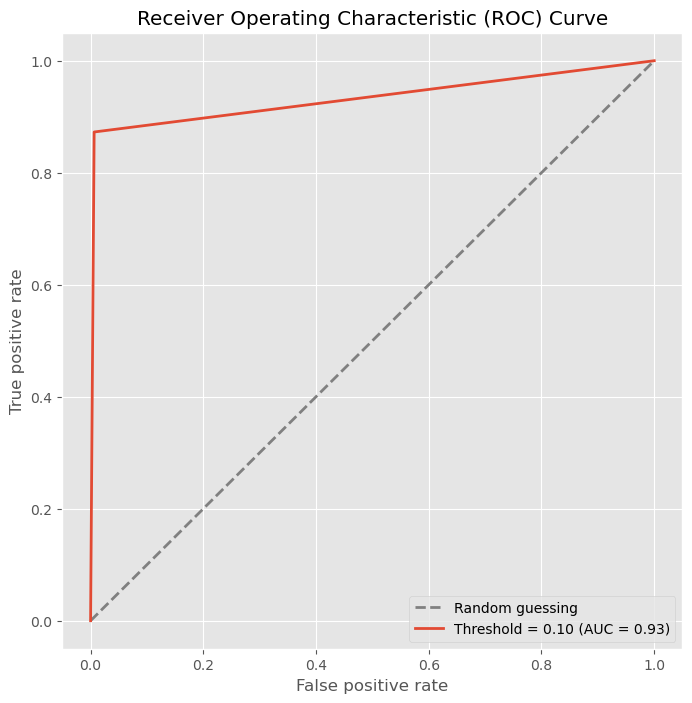

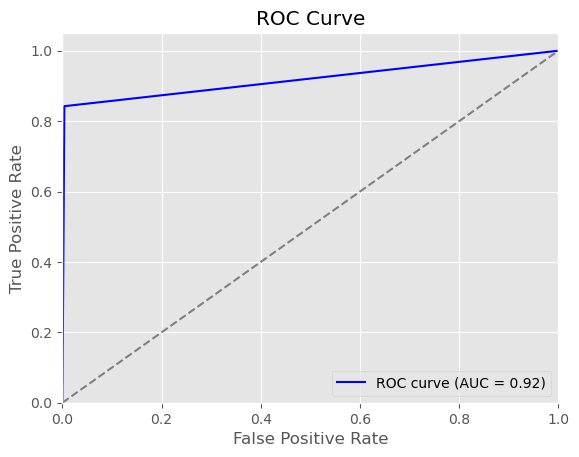

,model_id,validation on,threshold,auc,precision,recall,f1_score,accuracy,desc,sort_weight
14,model_1,Train,0.6,0.990748,100.0,98.15,99.07,99.07,Decision Tree | Normal H-Params,199.140748
0,model_1,Test,0.6,0.919233,45.2,84.24,58.83,99.54,Decision Tree | Normal H-Params,130.359233


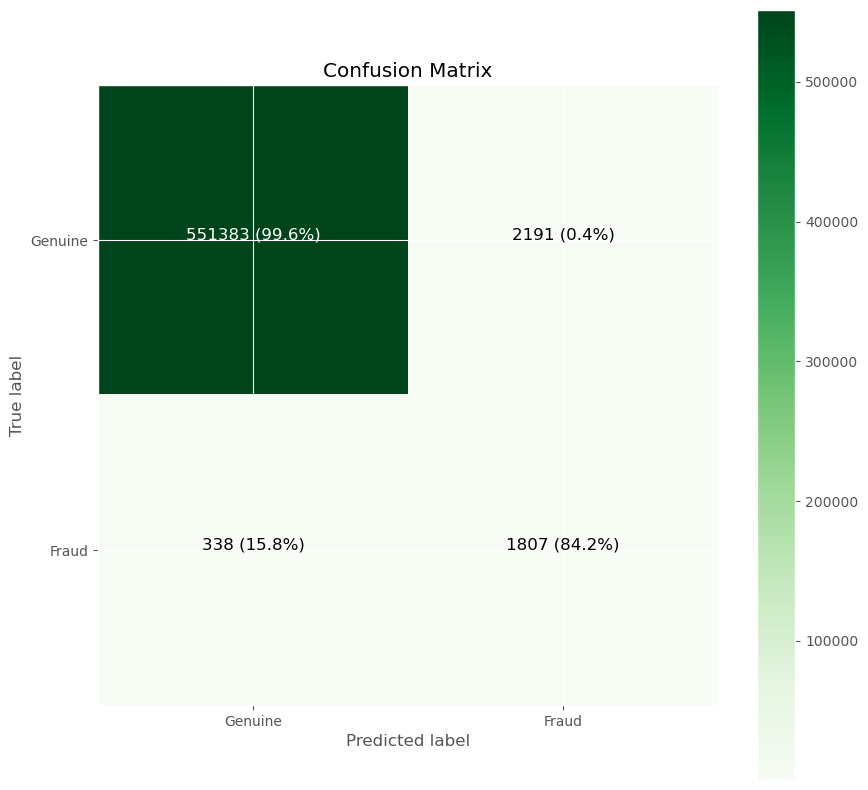

In [171]:
#model_1 = DecisionTreeClassifier(max_depth = 6, min_samples_split= 5,min_samples_leaf=5, random_state=42,class_weight = {0:20,1:1}) # creating the model object
model_1 = DecisionTreeClassifier(max_depth = 30, min_samples_split= 30, random_state=42,class_weight = {0:20,1:1}) # creating the model object
model_1_spec = 'Decision Tree | Normal H-Params'

model_1.fit(X_resampled,y_resampled) # fitting the model with train_sample

model_1_eval = evaluate_model(model_1,'model_1',model_1_spec,X_resampled, y_resampled) # calling the evaluate model function

model_1_eval['best']

Inference : Model is overfitting. And the precison is very less

### Model 2 : Decision Tree | HyperParameter Tuning

In [172]:
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn import metrics

In [173]:
# Defining the Search Space and cross validation scheme
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # creating the stratified K fold cross validation

model_2_spec = 'Decision Tree | Optimized H-Params'

model_2 = DecisionTreeClassifier(random_state = 42, class_weight = {0:20,1:1}) # creating the model object

# defining the hyperparameter space

param_grid = {'max_depth': [10,20,30],  
              'min_samples_split': [10,20,30,50],
              'min_samples_leaf': [5,10,20,50,100],
              }

In [174]:
# Training the hyper parameter space with hyperparameter-tuning dataset - In Halving Randomised Search

%time

# definnig the halving random search object

halving_search_dt = HalvingRandomSearchCV(estimator = model_2,
                                      param_distributions = param_grid,
                                      cv = skf,
                                      scoring = 'roc_auc',
                                      refit = True,
                                      n_jobs = -1,
                                      random_state = 42)

halving_search_dt.fit(X_hp_tuning,y_hp_tuning) # fitting

Wall time: 1 ms


HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                      estimator=DecisionTreeClassifier(class_weight={0: 20,
                                                                     1: 1},
                                                       random_state=42),
                      n_jobs=-1,
                      param_distributions={'max_depth': [10, 20, 30],
                                           'min_samples_leaf': [5, 10, 20, 50,
                                                                100],
                                           'min_samples_split': [10, 20, 30,
                                                                 50]},
                      random_state=42, scoring='roc_auc')

In [175]:
# Accessing the Best Parameters

best_params = halving_search_dt.best_params_
best_params

{'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 20}

Wall time: 0 ns


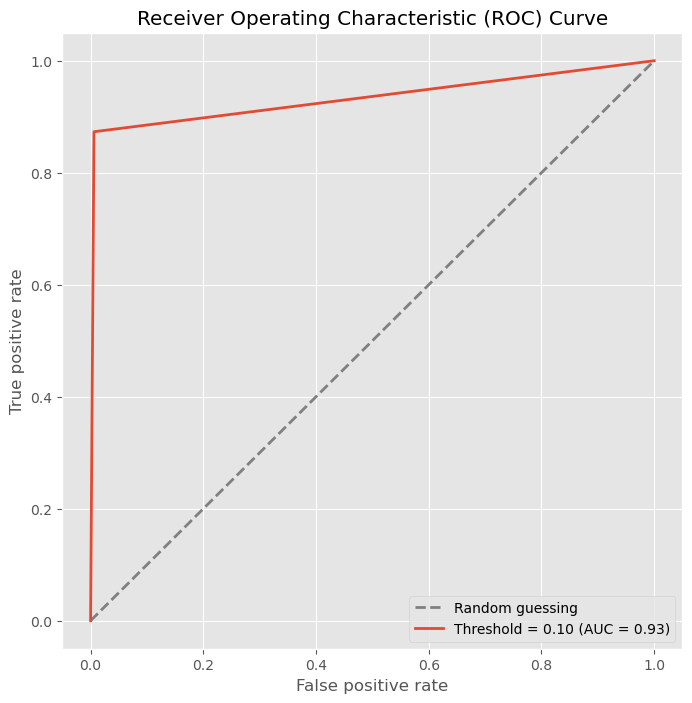

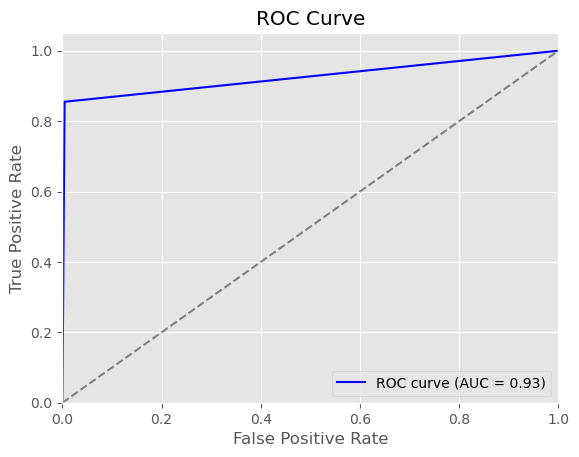

,model_id,validation on,threshold,auc,precision,recall,f1_score,accuracy,desc,sort_weight
14,model_2,Train,0.6,0.993596,99.99,98.73,99.36,99.36,Decision Tree | Optimized H-Params,199.713596
0,model_2,Test,0.6,0.925318,43.09,85.50,57.30,99.51,Decision Tree | Optimized H-Params,129.515318


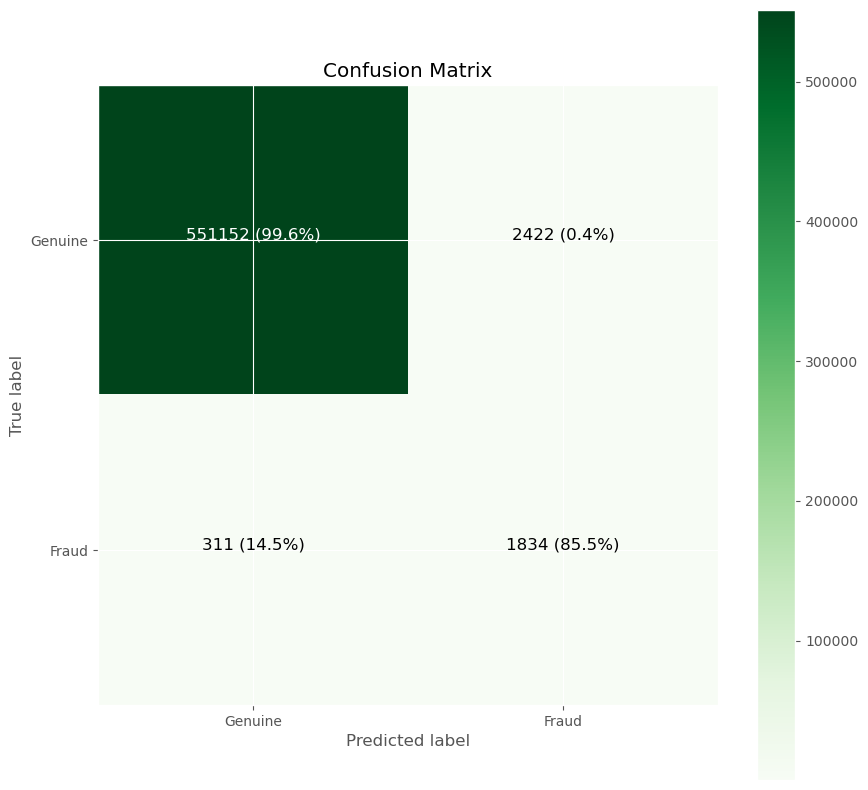

In [176]:
# Lets Build model with training sample - by resetting into the best hyperparemeters

%time

model_2.set_params(**best_params) # assignig the best parmeters

model_2.fit(X_resampled,y_resampled) # making the model learn from the training sample

model_2_eval = evaluate_model(model_2,'model_2',model_2_spec,X_resampled, y_resampled) # evaluating the model using the funstion call

model_2_eval['best']

Inference : Model 2 is slightly better from model 1. but still continue the the short coming of the model 1

### Model 3 : Random Forest Classifier

Wall time: 0 ns


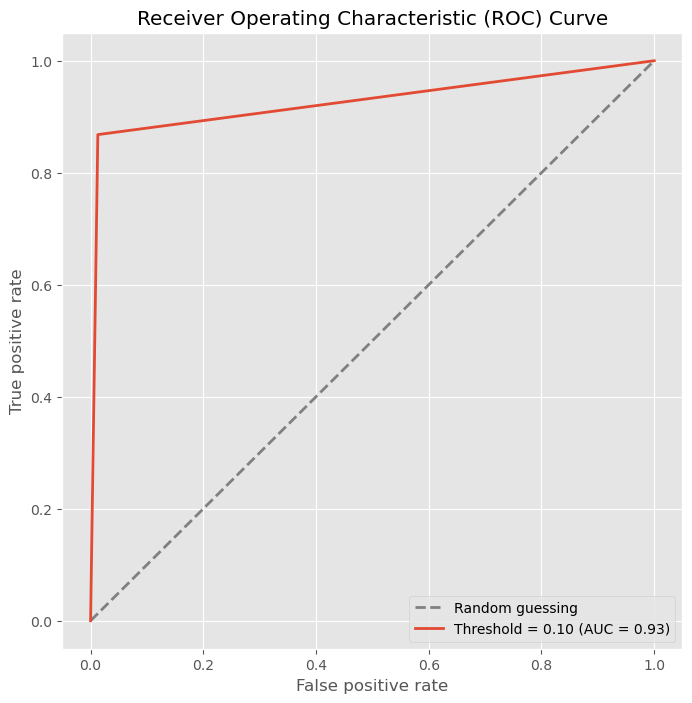

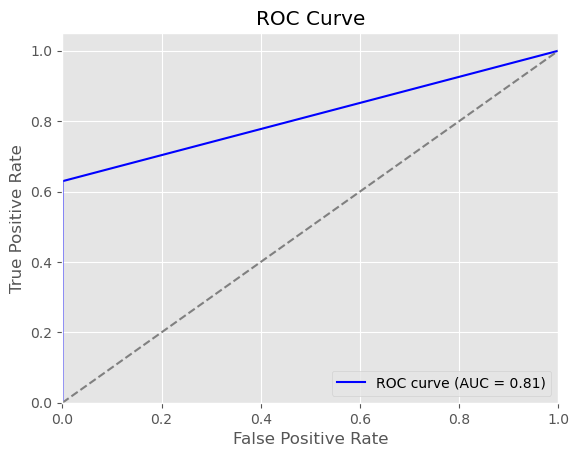

,model_id,validation on,threshold,auc,precision,recall,f1_score,accuracy,desc,sort_weight
14,model_3,Train,0.6,0.861802,99.97,72.38,83.97,86.18,Ransom Forest | Normal H-Params,173.211802
0,model_3,Test,0.6,0.814570,91.34,62.94,74.52,99.83,Ransom Forest | Normal H-Params,155.094570


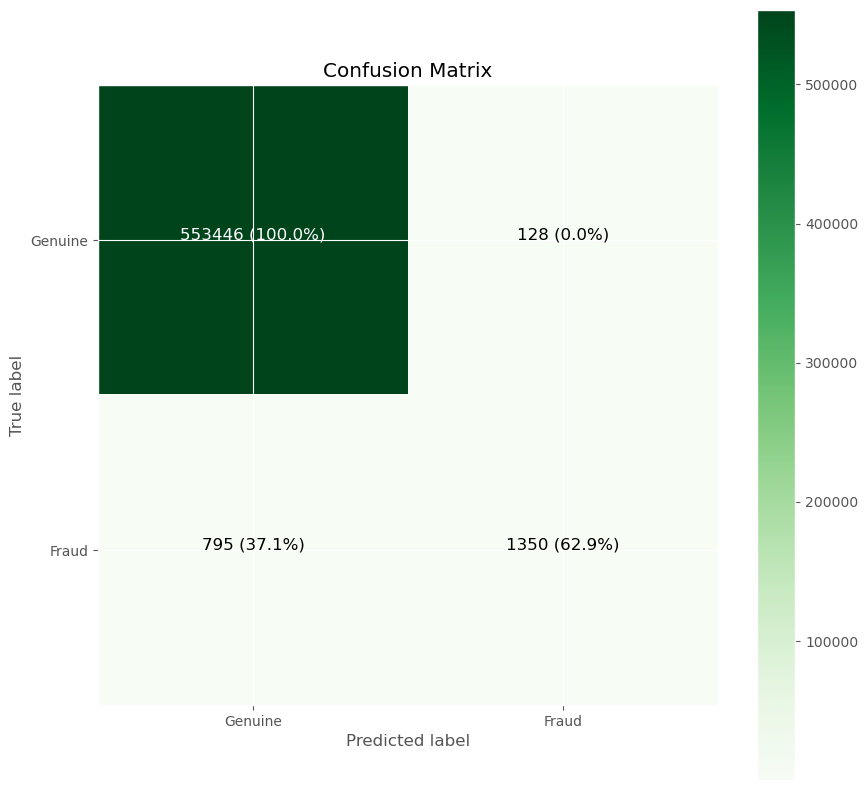

In [177]:
%time

model_3 = RandomForestClassifier(n_estimators = 50, max_depth = 10, min_samples_split= 50, random_state=42, n_jobs = -1, class_weight = {0:20,1:1}) # creating the object

model_3_spec = 'Ransom Forest | Normal H-Params'

model_3.fit(X_resampled,y_resampled) # fitting on the trainig set

model_3_eval = evaluate_model(model_3,'model_3',model_3_spec,X_resampled, y_resampled) # evaluating the model by the function call

model_3_eval['best']

Inference : Difference between precision and recall is quite high

### Model 4 : RandomForestClassifier | Hyperparameter Tuning

In [178]:
model_4_spec = 'Random Forest | Optimized H-Params'

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # cross validation scheme

model_4 = RandomForestClassifier(random_state=42, class_weight = {0:20,1:1}) # model object

# hyperparamer space

param_grid = {
    'n_estimators' : [100,200,300,500],
    'max_depth': [5,10,20],
    'min_samples_split': [10,20,30],
    'min_samples_leaf': [10,20,30,50],
    'max_features': ['sqrt', 'log2']
    }

In [179]:
%%time

halving_search_rfc = HalvingRandomSearchCV(estimator = model_4,
                                      param_distributions = param_grid,
                                      cv = skf,
                                      scoring = 'roc_auc',
                                      refit = True,
                                      n_jobs = -1,
                                      random_state = 42)

halving_search_rfc.fit(X_hp_tuning,y_hp_tuning) # fitting 

Wall time: 4min 30s


HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                      estimator=RandomForestClassifier(class_weight={0: 20,
                                                                     1: 1},
                                                       random_state=42),
                      n_jobs=-1,
                      param_distributions={'max_depth': [5, 10, 20],
                                           'max_features': ['sqrt', 'log2'],
                                           'min_samples_leaf': [10, 20, 30, 50],
                                           'min_samples_split': [10, 20, 30],
                                           'n_estimators': [100, 200, 300,
                                                            500]},
                      random_state=42, scoring='roc_auc')

In [180]:
best_params = halving_search_rfc.best_params_
best_params

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 10}

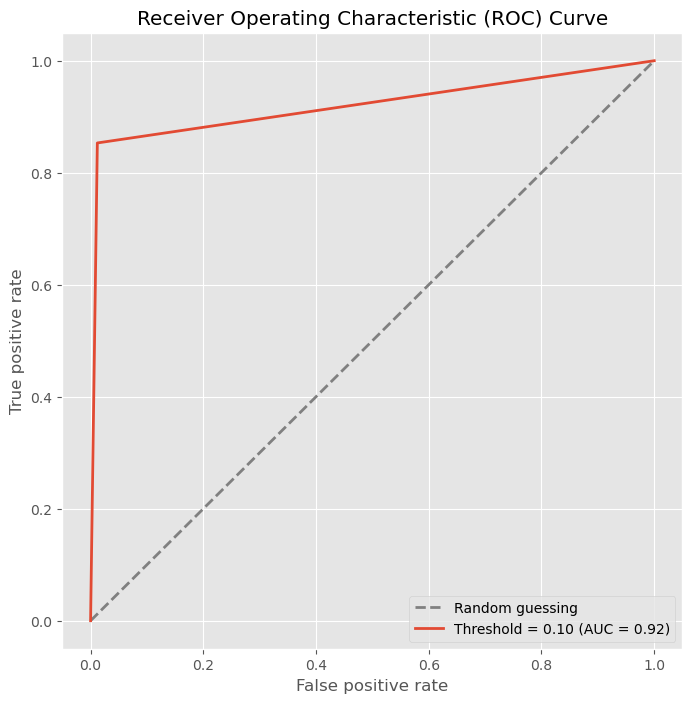

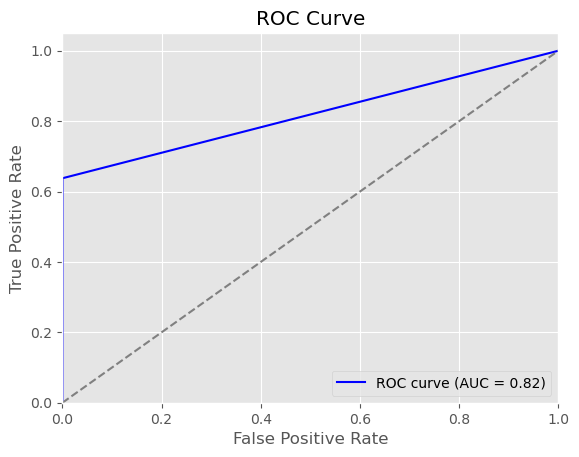

Wall time: 25min 58s


,model_id,validation on,threshold,auc,precision,recall,f1_score,accuracy,desc,sort_weight
14,model_4,Train,0.6,0.870713,99.98,74.16,85.15,87.07,Random Forest | Optimized H-Params,175.010713
0,model_4,Test,0.6,0.818746,90.12,63.78,74.69,99.83,Random Forest | Optimized H-Params,154.718746


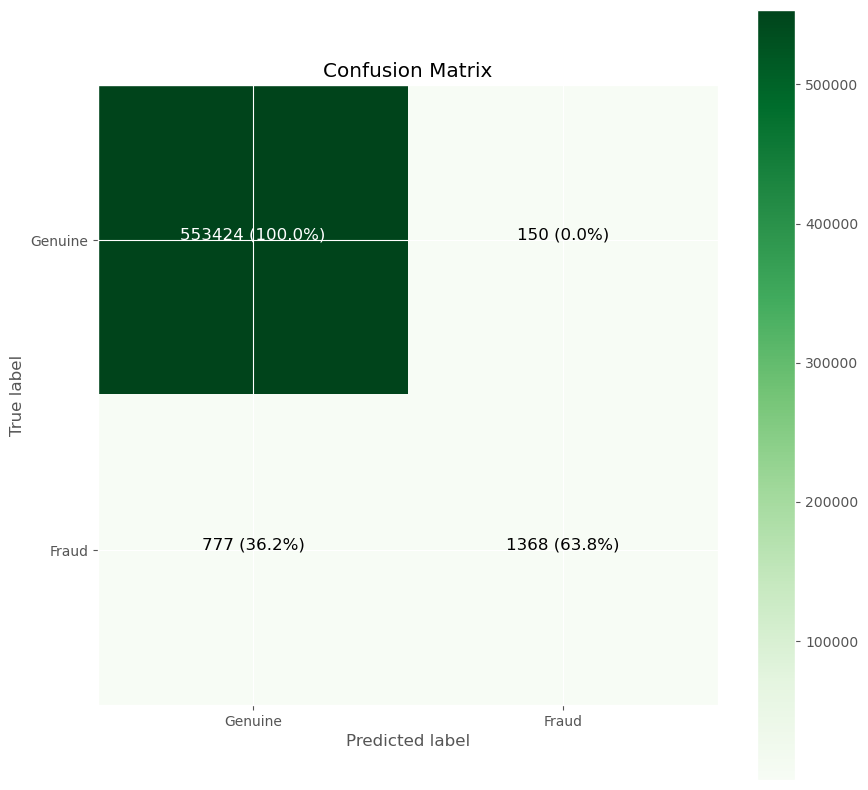

In [181]:
%%time
model_4.set_params(**best_params) # assigning best parameters to the model

model_4.fit(X_resampled,y_resampled) # fitting on the training sample

model_4_eval = evaluate_model(model_4,'model_4',model_4_spec,X_resampled, y_resampled) # evaluating the model

model_4_eval['best']

### Model 5 : XgBoost

[11:39:21] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "class_weight", "loss", "min_samples_splits" } are not used.



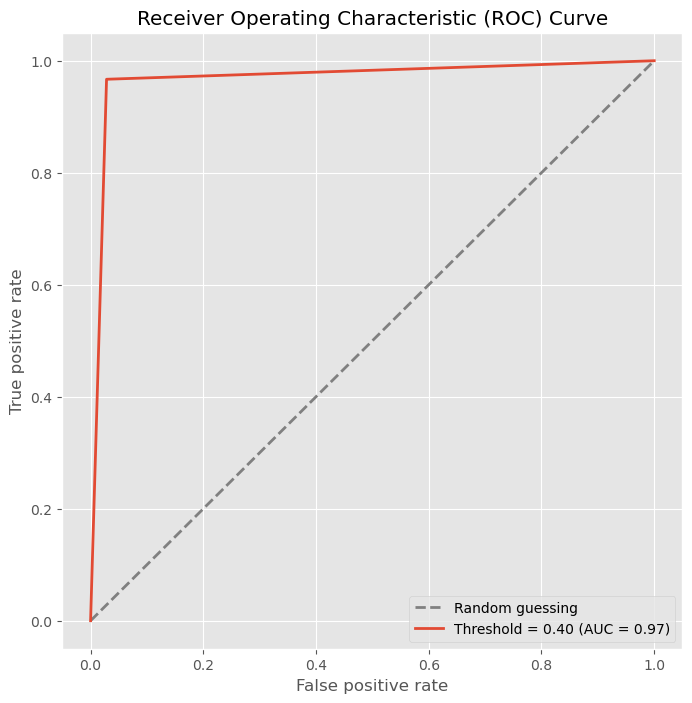

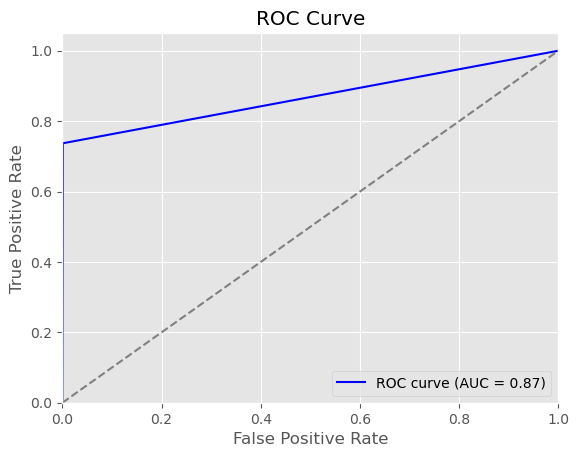

Wall time: 1min 58s


,model_id,validation on,threshold,auc,precision,recall,f1_score,accuracy,desc,sort_weight
15,model_5,Train,0.8,0.914708,99.88,83.04,90.69,91.47,XGBoost | Normal H-Params,183.834708
0,model_5,Test,0.8,0.868053,74.89,73.71,74.30,99.80,XGBoost | Normal H-Params,149.468053


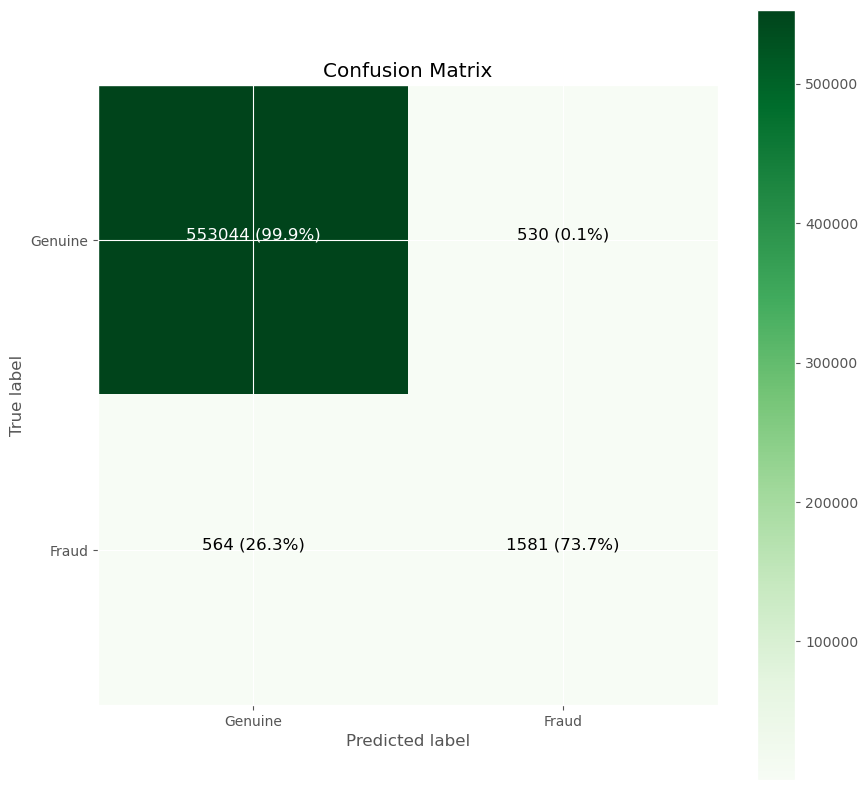

In [182]:
%%time
model_5 = XGBClassifier(n_estimators = 100,
                        max_depth = 10,
                        learning_rate = 0.01,
                        min_samples_splits =30,
                        loss = 'deviance',
                        n_jobs = -1,
                        random_state = 42,class_weight = {0:20,1:1}) # create the object

model_5_spec = 'XGBoost | Normal H-Params'

model_5.fit(X_resampled,y_resampled) # fitting the training sample

model_5_eval = evaluate_model(model_5,'model_5',model_5_spec,X_resampled, y_resampled) # evaluating the model

model_5_eval['best']

Inference : In terms of the roc_auc and recall, the model has improved by a big mark and does not overfitting in that aspect, but on the other side the precison being the real concern for the model ~ 11.5, which is very low.

### Model 6 : XGBoost | Hyperparameter optimization

In [183]:
!pip install scikit-optimize
clear_output()

In [184]:
from skopt import BayesSearchCV

In [185]:
# Lets define the hyperparameter space
# For Bayesian search, the parameter space consist of range of hyperparamters

params_grid = {'n_estimators' : (50,300,'uniform'),
                'max_depth' : (4,10,'uniform'),
               'learning_rate' : (0.001,3.0,'log-uniform'),
               'min_samples_splits' : (0.001,0.999,'log-uniform'),
               'subsample': (0.5,1.0,'log-uniform'),
               'colsample_bytree':  (0.4,1.0,'log-uniform'),
               'colsample_bylevel':  (0.4,1.0,'log-uniform'),
               'loss' : ['exponential','devian    cce'],
               'reg_lambda': (0.1,100.0,'log-uniform'),
               'gamma': (0.25,1.0,'log-uniform'),
               'lambda' :(0.1,100.0,'log-uniform')
               }

In [186]:
%%time

model_6 = XGBClassifier(random_state = 42, class_weight = {0:20,1:1}) # creating the object

model_6_spec = 'XGBoost | Opmtimize H-Params - Bayesian Search'

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # defining the cross validation scheme

search = BayesSearchCV(estimator = model_6,
                       search_spaces = params_grid,
                       optimizer_kwargs= {'base_estimator': 'GP'}, # Gaussian Process
                       n_iter = 10,
                       scoring = 'precision',
                       n_jobs = -1,
                       verbose = 1,
                       random_state = 42
                       )


search.fit(X_hp_tuning,y_hp_tuning)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[11:51:11] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "class_weight", "loss", "min_samples_splits" } are not used.

Wall time: 10min 12s


BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None,
                                      class_weight={0: 20, 1: 1},
                                      colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None...
                             'colsample_bytree': (0.4, 1.0, 'log-uniform'),
                             'gamma': (0.25, 1.0, 'log-uniform'),
                             'lambda': (0.1, 100.0, 'log-uniform'),


In [187]:
best_params = search.best_params_
best_params

OrderedDict([('colsample_bylevel', 0.7040776470171162),
             ('colsample_bytree', 0.8139701880000765),
             ('gamma', 0.4112381075696225),
             ('lambda', 41.97356777180994),
             ('learning_rate', 0.11497686662185184),
             ('loss', 'exponential'),
             ('max_depth', 8),
             ('min_samples_splits', 0.01845288851847439),
             ('n_estimators', 233),
             ('reg_lambda', 7.996477386556893),
             ('subsample', 0.9488693546483368)])

Wall time: 0 ns
[11:51:36] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "class_weight", "loss", "min_samples_splits" } are not used.



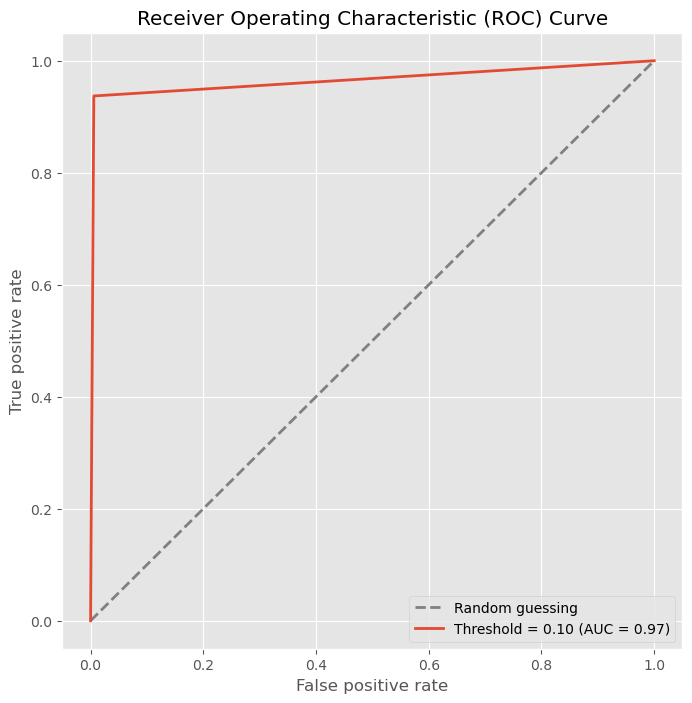

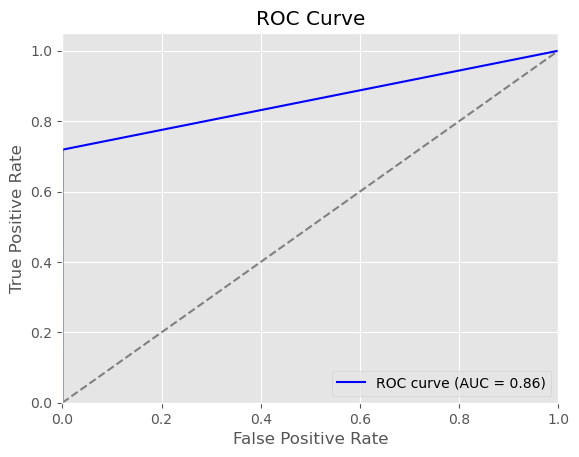

,model_id,validation on,threshold,auc,precision,recall,f1_score,accuracy,desc,sort_weight
16,model_6,Train,0.9,0.997404,100.00,99.48,99.74,99.74,XGBoost | Opmtimize H-Params - Bayesian Search,200.477404
0,model_6,Test,0.9,0.859387,96.31,71.89,82.33,99.88,XGBoost | Opmtimize H-Params - Bayesian Search,169.059387


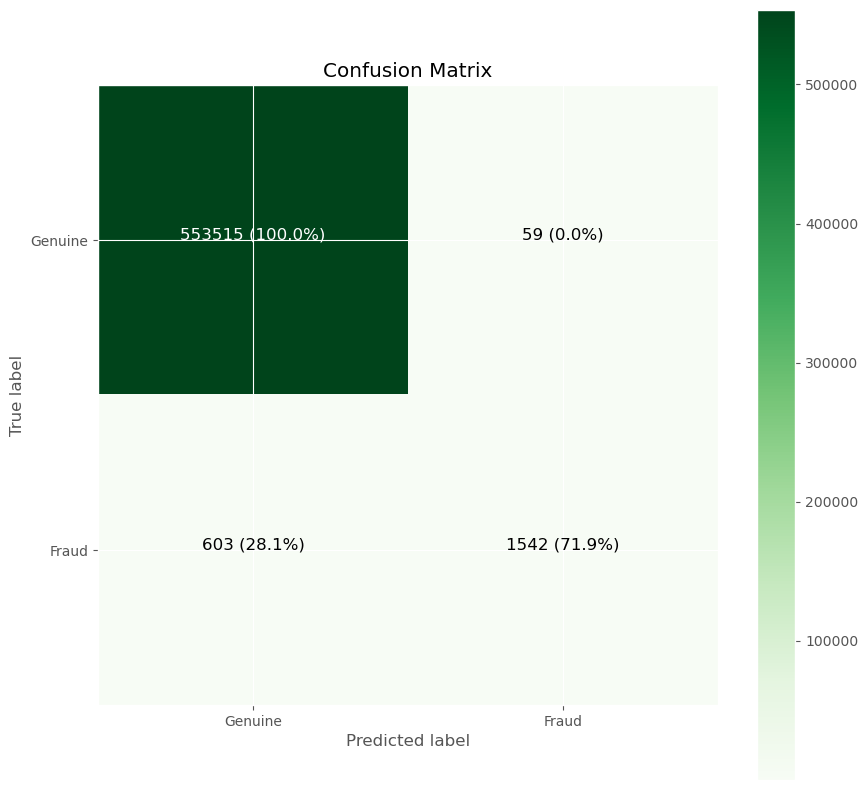

In [188]:
# Lets Build model with training sample - by resetting into the best hyperparemeters

%time

model_6.set_params(**best_params) # assigning the best parameters to the model

model_6.fit(X_resampled, y_resampled) # fitting on the train_sample

model_6_eval = evaluate_model(model_6,'model_6',model_6_spec,X_resampled, y_resampled) # evaluating the model

model_6_eval['best']

### Model 7 : Logistic Regression

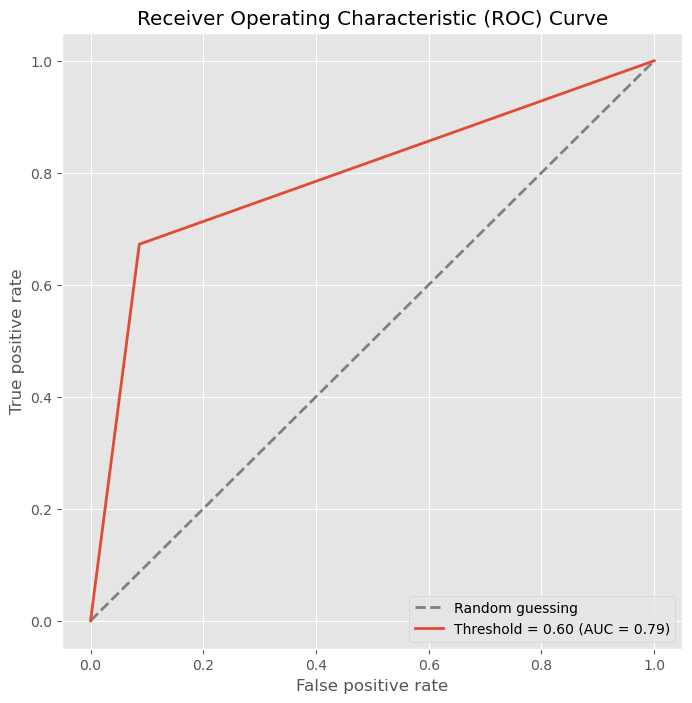

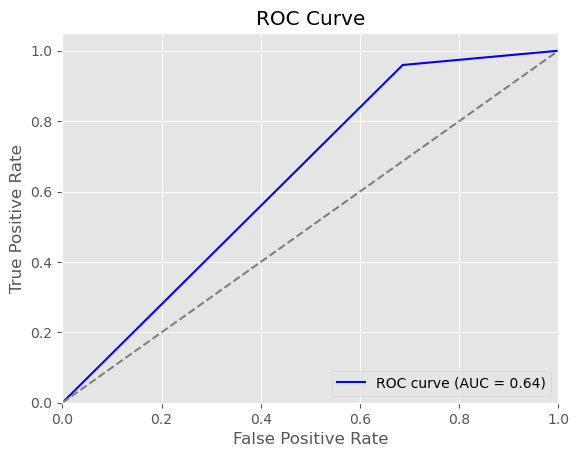

,model_id,validation on,threshold,auc,precision,recall,f1_score,accuracy,desc,sort_weight
12,model_7,Train,0.1,0.628136,57.48,98.49,72.59,62.81,Logistic Regression| Normal H-Params,156.598136
0,model_7,Test,0.1,0.636675,0.54,95.94,1.07,31.64,Logistic Regression| Normal H-Params,97.116675


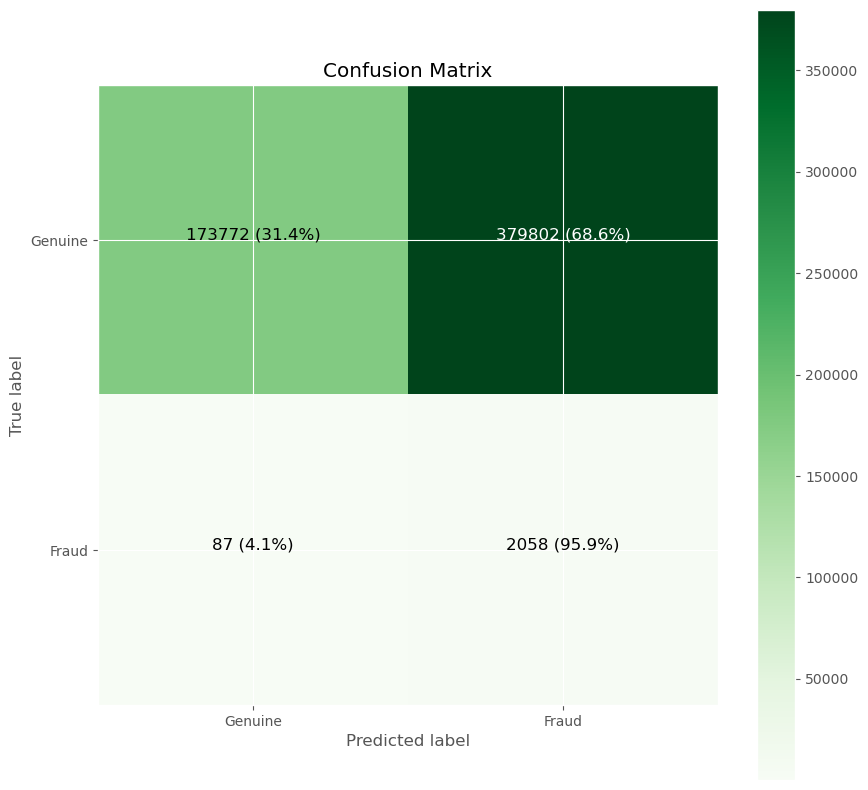

In [189]:
model_7 = LogisticRegression()
model_7_spec = "Logistic Regression| Normal H-Params"
model_7.fit(X_resampled,y_resampled)
model_7_eval = evaluate_model(model_7,'model_7',model_7_spec,X_resampled, y_resampled) # calling the evaluate model function

model_7_eval['best']

### Model 8 : Logistic Regression| HyperParameter Tuning

In [190]:

model_8 = LogisticRegression()
model_8_spec = "Logistic Regression| Optimized H-Params"
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['liblinear', 'saga']
}

# Training the hyper parameter space with hyperparameter-tuning dataset - In Halving Randomised Search

%time

# definnig the halving random search object
hrscv = HalvingRandomSearchCV(
    model_8,
    param_distributions=param_dist,
    factor=3,
    resource='n_samples',
    max_resources=5000,
    random_state=42
)
hrscv.fit(X_hp_tuning,y_hp_tuning) # fitting

Wall time: 0 ns


HalvingRandomSearchCV(estimator=LogisticRegression(), max_resources=5000,
                      param_distributions={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                                           'penalty': ['l1', 'l2'],
                                           'solver': ['liblinear', 'saga']},
                      random_state=42)

In [191]:
best_params = hrscv.best_params_
best_params

{'solver': 'saga', 'penalty': 'l2', 'C': 1.0}

Wall time: 0 ns


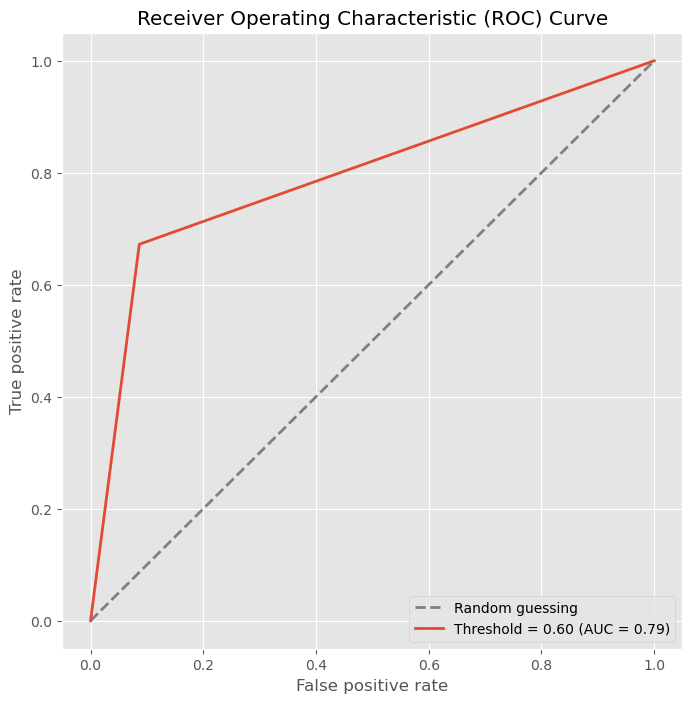

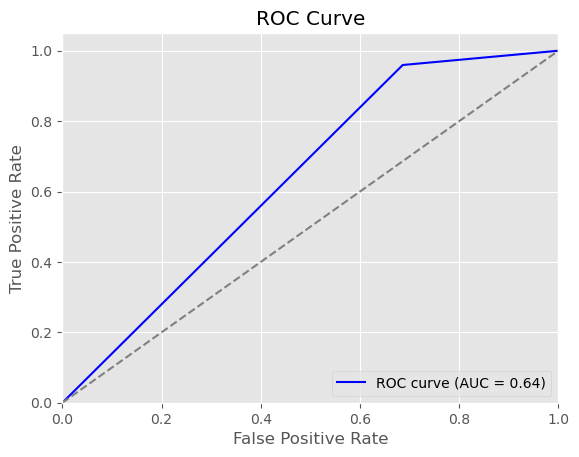

,model_id,validation on,threshold,auc,precision,recall,f1_score,accuracy,desc,sort_weight
12,model_8,Train,0.1,0.628136,57.48,98.49,72.59,62.81,Logistic Regression| Optimized H-Params,156.598136
0,model_8,Test,0.1,0.636660,0.54,95.94,1.07,31.64,Logistic Regression| Optimized H-Params,97.116660


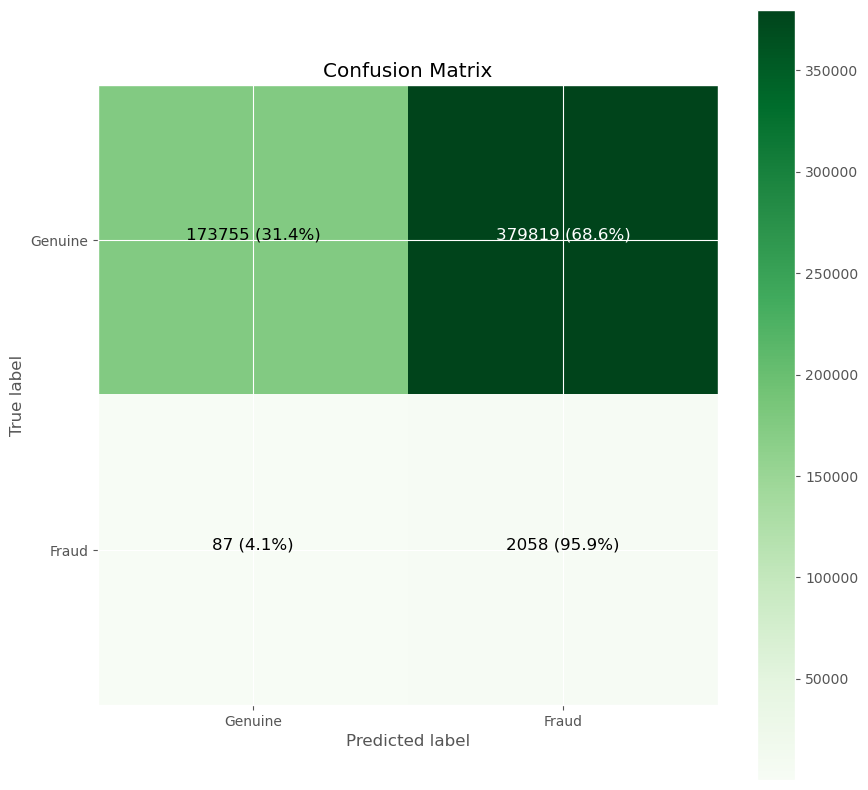

In [192]:
%time

model_8.set_params(**best_params) # assignig the best parmeters

model_8.fit(X_resampled,y_resampled) # making the model learn from the training sample

model_8_eval = evaluate_model(model_8,'model_8',model_8_spec,X_resampled, y_resampled) # evaluating the model using the funstion call

model_8_eval['best']

### Model 9 : Base Decision tree

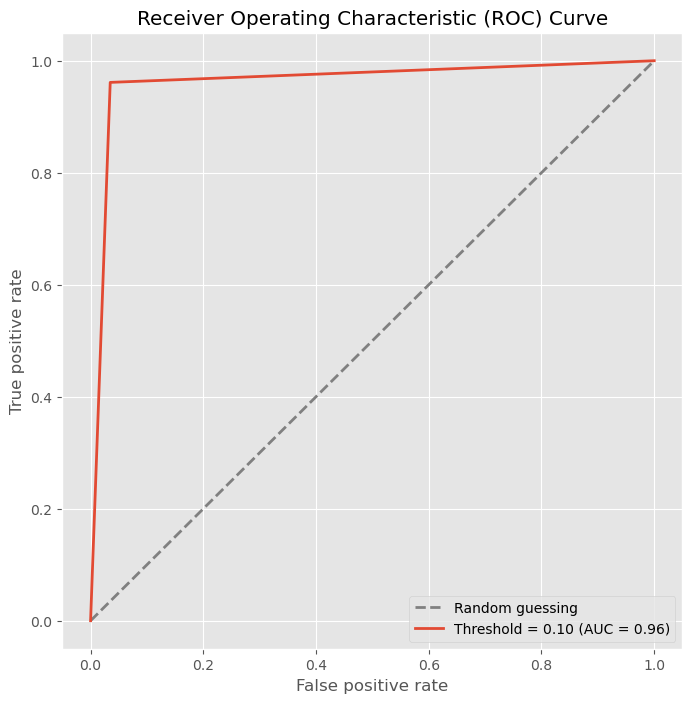

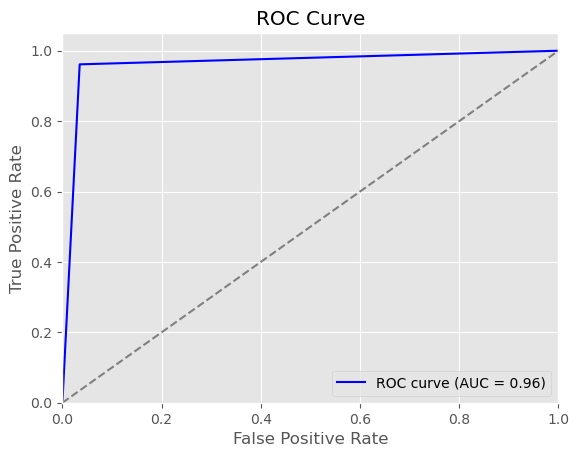

,model_id,validation on,threshold,auc,precision,recall,f1_score,accuracy,desc,sort_weight
9,model_9,Train,0.1,1.000000,100.00,100.00,100.00,100.00,Base Decision Tree,201.000000
0,model_9,Test,0.1,0.963234,9.66,96.13,17.55,96.51,Base Decision Tree,106.753234


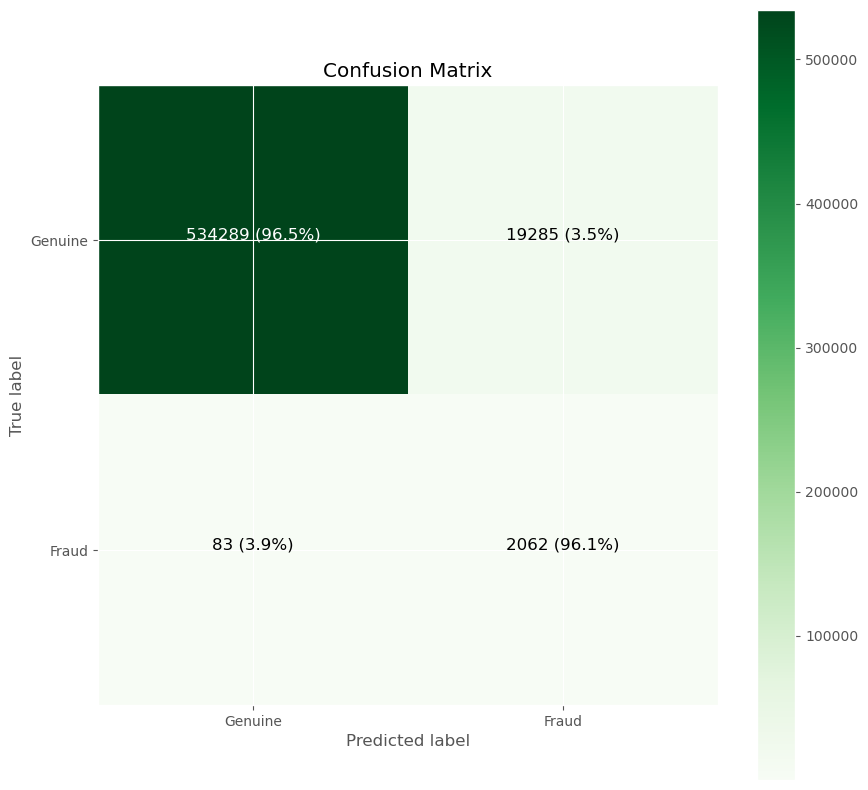

In [193]:
model_9 = DecisionTreeClassifier(random_state=42) # creating the model object
model_9_spec = 'Base Decision Tree'

model_9.fit(X_org_resampled,y_org_resampled) # fitting the model with train_sample

model_9_eval = evaluate_model(model_9,'model_9',model_9_spec,X_org_resampled, y_org_resampled) # calling the evaluate model function

model_9_eval['best']

### Model 10: Base Logistic Regression

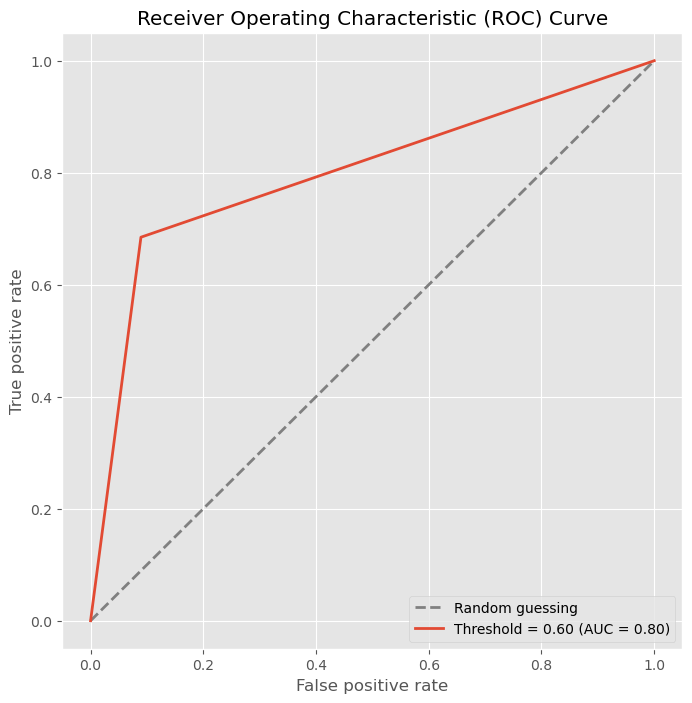

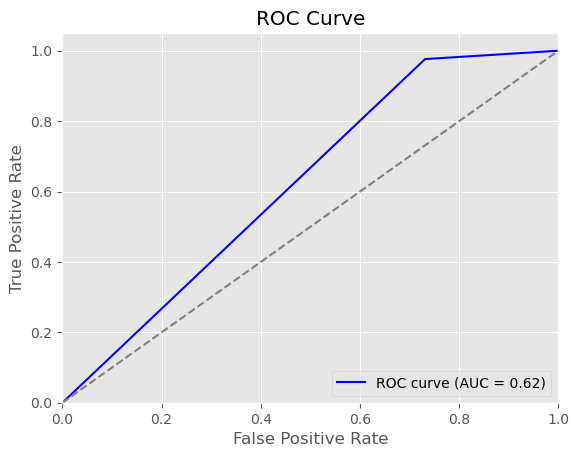

,model_id,validation on,threshold,auc,precision,recall,f1_score,accuracy,desc,sort_weight
11,model_10,Train,0.1,0.611910,56.40,98.64,71.77,61.19,Base Logistic Regression,155.651910
0,model_10,Test,0.1,0.622522,0.51,97.62,1.02,27.16,Base Logistic Regression,98.752522


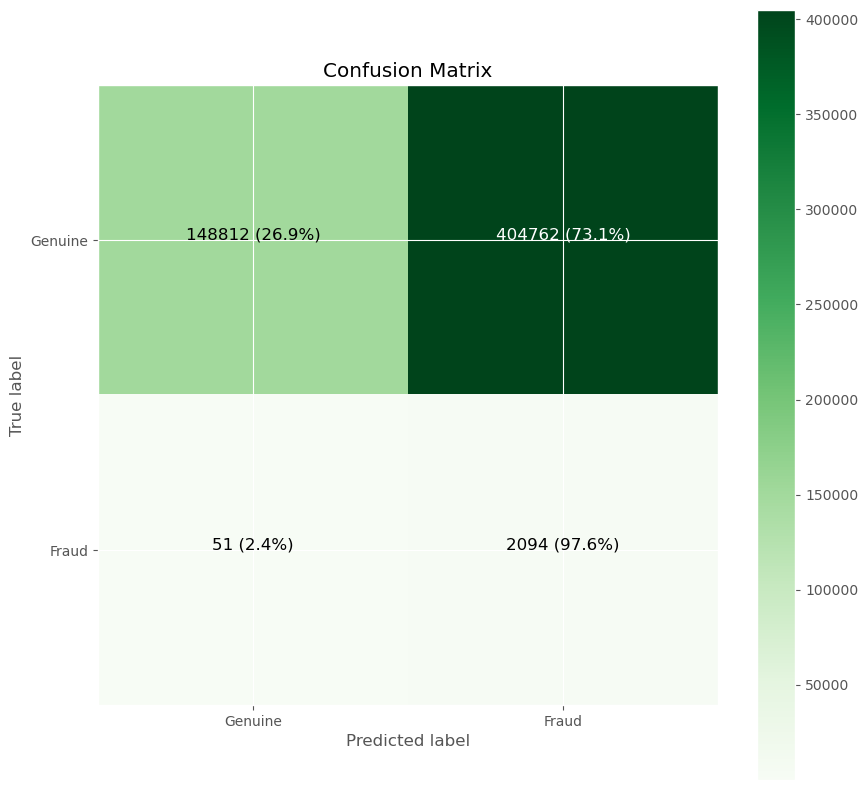

In [194]:
model_10 = LogisticRegression()
model_10_spec = "Base Logistic Regression"
model_10.fit(X_org_resampled,y_org_resampled)
model_10_eval = evaluate_model(model_10,'model_10',model_10_spec,X_org_resampled, y_org_resampled) # calling the evaluate model function

model_10_eval['best']

### Model 11: Base RandomForest

Wall time: 0 ns


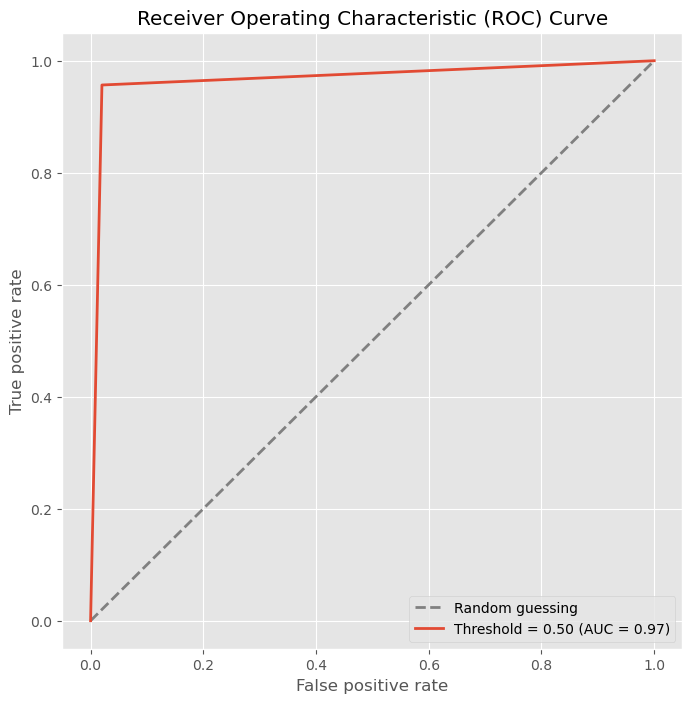

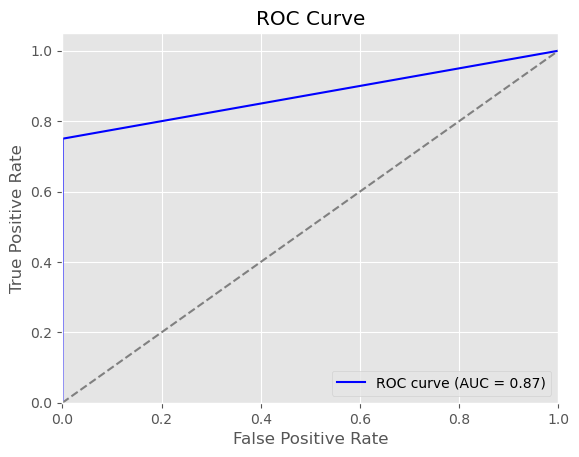

,model_id,validation on,threshold,auc,precision,recall,f1_score,accuracy,desc,sort_weight
17,model_11,Train,0.9,0.957168,100.00,91.43,95.53,95.72,Base Random Forest,192.387168
0,model_11,Test,0.9,0.874702,80.29,75.01,77.56,99.83,Base Random Forest,156.174702


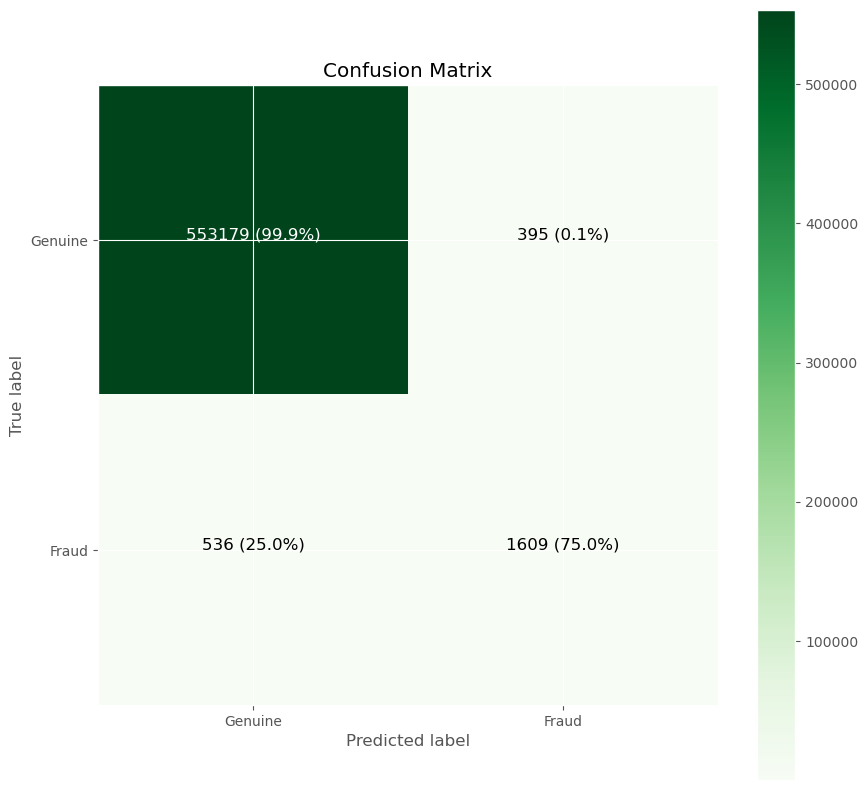

In [195]:
%time

model_11 = RandomForestClassifier(random_state=42) # creating the object

model_11_spec = 'Base Random Forest'

model_11.fit(X_org_resampled,y_org_resampled) # fitting on the trainig set

model_11_eval = evaluate_model(model_11,'model_11',model_11_spec,X_org_resampled, y_org_resampled) # evaluating the model by the function call

model_11_eval['best']

## Choosing the best Model

- Compare the models
- Choosing the best model
- Display the model
- Print the feature importances

#### Criteria
We shall be choosing the model with high AUC along with decent Precision and Recall

In [197]:
# Lets compare all the model been build till now

eval_list = [model_1_eval['all_test'],model_2_eval['all_test'],model_3_eval['all_test'],
             model_4_eval['all_test'],model_5_eval['all_test'],model_6_eval['all_test'],
             model_7_eval['all_test'],model_8_eval['all_test'],model_9_eval['all_test'],model_10_eval['all_test'],model_11_eval['all_test']]

# sorting and printing the best models 
# sorting the model in way that it provided best combined value of 'roc_auc', 'precision' and 'recall'

final_eval_table = pd.concat(eval_list, axis = 0)
final_eval_table['sort_weight'] = final_eval_table[['auc','recall','precision',]].sum(axis = 1)
final_eval_table.sort_values(by = 'sort_weight', ascending = False, inplace = True)
print(final_eval_table.to_string())

   model_id validation on  threshold       auc  precision  recall  f1_score  accuracy                                            desc  sort_weight
0   model_6          Test        0.9  0.859387      96.31   71.89     82.33     99.88  XGBoost | Opmtimize H-Params - Bayesian Search   169.059387
1   model_6          Test        0.8  0.878667      92.38   75.76     83.25     99.88  XGBoost | Opmtimize H-Params - Bayesian Search   169.018667
2   model_6          Test        0.7  0.894451      89.06   78.93     83.69     99.88  XGBoost | Opmtimize H-Params - Bayesian Search   168.884451
3   model_6          Test        0.6  0.906945      84.89   81.45     83.13     99.87  XGBoost | Opmtimize H-Params - Bayesian Search   167.246945
4   model_6          Test        0.5  0.916383      80.14   83.36     81.72     99.86  XGBoost | Opmtimize H-Params - Bayesian Search   164.416383
5   model_6          Test        0.4  0.928779      73.77   85.87     79.36     99.83  XGBoost | Opmtimize H-Params - 

In [205]:
# Lets compare all the model been build till now

eval_list = [model_1_eval['best'],model_2_eval['best'],model_3_eval['best'],
             model_4_eval['best'],model_5_eval['best'],model_6_eval['best'],
             model_7_eval['best'],model_8_eval['best'],model_9_eval['best'],model_10_eval['best'],model_11_eval['best']]

# sorting and printing the best models 
# sorting the model in way that it provided best combined value of 'roc_auc', 'precision' and 'recall'

final_eval_table = pd.concat(eval_list, axis = 0)
final_eval_table['sort_weight'] = final_eval_table[['auc','recall','precision',]].sum(axis = 1)
final_eval_table.sort_values(by = 'sort_weight', ascending = False, inplace = True)
#print(final_eval_table.to_string())
pd.set_option('display.max_colwidth', 15)
print(final_eval_table.to_string(index=False, justify='center', float_format='%.2f'))                                                                                    #ff

model_id validation on  threshold  auc  precision  recall  f1_score  accuracy                      desc                       sort_weight
 model_9     Train        0.10    1.00   100.00    100.00   100.00    100.00                              Base Decision Tree    201.00   
 model_6     Train        0.90    1.00   100.00     99.48    99.74     99.74  XGBoost | Opmtimize H-Params - Bayesian Search    200.48   
 model_2     Train        0.60    0.99    99.99     98.73    99.36     99.36              Decision Tree | Optimized H-Params    199.71   
 model_1     Train        0.60    0.99   100.00     98.15    99.07     99.07                 Decision Tree | Normal H-Params    199.14   
model_11     Train        0.90    0.96   100.00     91.43    95.53     95.72                              Base Random Forest    192.39   
 model_5     Train        0.80    0.91    99.88     83.04    90.69     91.47                       XGBoost | Normal H-Params    183.83   
 model_4     Train        0.60    

#### Final Model

- From the above table it is evident that the model 6 is the best model in terms of AUC, Precision and Recall at a threshold 
  of 0.9


In [200]:

print('\nProbability Threshold :', 0.9,'\n') # print the threshold value for the best result

model_6


Probability Threshold : 0.9 



XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 20, 1: 1}, colsample_bylevel=0.7040776470171162,
              colsample_bynode=None, colsample_bytree=0.8139701880000765,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.4112381075696225,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=41.97356777180994,
              learning_rate=0.11497686662185184, loss='exponential',
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, min_samples_splits=0.01845288851847439,
              missing=nan, monotone_constraints=None, n_estimators=233, ...)

In [201]:
# Lets look at the feature importance

importances = model_6.feature_importances_ # access the feature importances from the best model

feature_importance = pd.DataFrame({'variable':X_train.columns, 'importances':importances})

feature_importance

,variable,importances
0,amt,0.196933
1,state,0.009382
2,city_pop,0.003325
3,trans_hour,0.086923
4,trans_month,0.013010
5,trans_dayofweek,0.025578
6,timedelta_last_trans,0.020860
7,cust_age,0.007356
8,lat_dist_cust_merch,0.001227
9,long_dist_cust_merch,0.000917


##### END